# import all stuff

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# imports and prints a results file
just for one file

In [4]:
data = pd.read_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/behavioural_files/behavioural_output_sub-801_session-01_dummy_2024-09-09_15-09-26.csv', delimiter=';')

print(data)

     trial  emotional_cue_time response objectively_correct  \
0        0        1.725887e+09      NaN                Late   
1        1        1.725887e+09     down                Even   
2        2        1.725887e+09     down                Even   
3        3        1.725887e+09       up                Even   
4        4        1.725888e+09       up                Even   
..     ...                 ...      ...                 ...   
663    663        1.725892e+09      NaN                Late   
664    664        1.725892e+09     down               False   
665    665        1.725892e+09       up                True   
666    666        1.725892e+09     down                True   
667    667        1.725892e+09     down                True   

    subjectively_correct  response_time   RT_s  feedback_time  stimuli_type  \
0                   Late   1.725887e+09  1.201   1.725887e+09             1   
1                  False   1.725887e+09  0.394   1.725887e+09             3   
2     

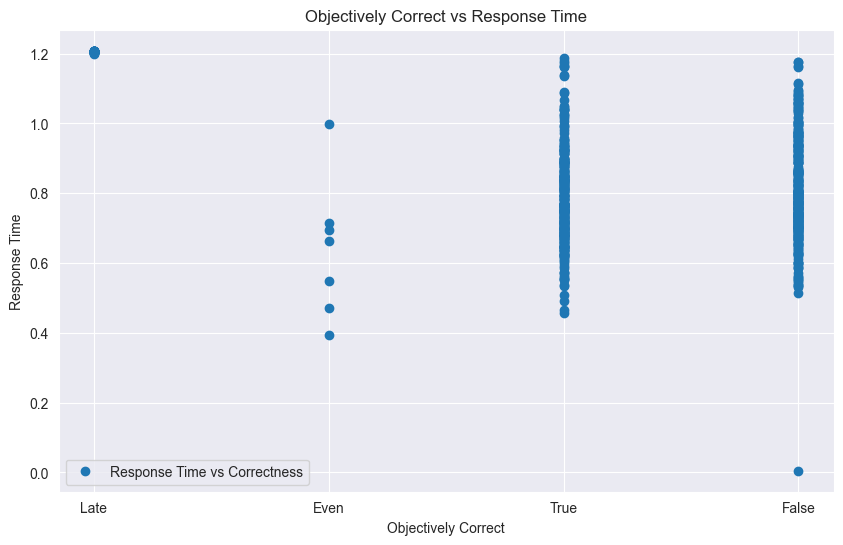

In [5]:
#load csv to data frame
objectively_correct = data['objectively_correct']
response_time = data['RT_s']

plt.figure(figsize=(10, 6))
plt.plot(objectively_correct, response_time, 'o', label='Response Time vs Correctness')

plt.xlabel('Objectively Correct')
plt.ylabel('Response Time')
plt.title('Objectively Correct vs Response Time')

plt.legend()
plt.grid(True)
plt.show()
#combine participants into 1 big data frame and automate this to ease it for following sessions 
#have data for all participants 
#Have participants alternating performance, and look at window 6 trials after every switch so find out a way to plot that specifically creating a specific line for each participant instead of the average 

# Concatenating all the participants together

In [6]:
import pandas as pd
import glob2

# Directory path where your CSV files are stored
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/behavioural_files/'

# Use glob2 to get a list of all CSV files in the directory
csv_files = glob2.glob(directory_path + "*.csv")

# List to hold each participant's data as a DataFrame
dataframes = []

# Loop over each file in the directory
for file_name in csv_files:
    # Extract the actual file name without the full path
    base_name = file_name.split('/')[-1]

    # Extract participant ID from the file name
    participant_id = base_name.split('_')[2]  # e.g., 'sub-801'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name)

    # Add a column for the participant ID
    df['participant_id'] = participant_id

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display or save the combined DataFrame
print(combined_df.head())

combined_df.to_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/combined_behavioral_data.csv', index=False)

  trial;emotional_cue_time;response;objectively_correct;subjectively_correct;response_time;RT_s;stimuli_type;iti;probability_condition;face_type;stimuli_name;reward_amount  \
0  0;1720003852.6171713;up;Even;False;1720003853....                                                                                                                          
1  1;1720003857.950667;down;Even;True;1720003858....                                                                                                                          
2  2;1720003863.2989242;up;Even;False;1720003863....                                                                                                                          
3  3;1720003867.63681;down;Even;True;1720003868.2...                                                                                                                          
4  4;1720003871.9802082;down;Even;False;172000387...                                                                         

# Automating the process of concatenating participant data 



In [7]:
import pandas as pd
import glob2
#remove even trials before exporting them 
# Directory path where your CSV files are stored
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/behavioural_files/'

# Use glob2 to get a list of all CSV files in the directory
csv_files = glob2.glob(directory_path + "*.csv")

# List to hold each participant's session data as a DataFrame
dataframes = []

# Loop over each file in the directory
for file_name in csv_files:
    # Extract the actual file name without the full path
    base_name = file_name.split('/')[-1]
    
    # Debugging: Print file name to check parsing
    print(f"Processing file: {base_name}")
    
    # Extract participant ID (e.g., 'sub-801') and session number (e.g., 'session-01')
    try:
        participant_id = base_name.split('_')[2]  # 'sub-801'
        session_number = base_name.split('_')[3]  # 'session-01'
        
        # Debugging: Print extracted participant ID and session number
        print(f"Participant ID: {participant_id}, Session Number: {session_number}")
    except IndexError:
        print(f"Error extracting participant ID or session number from file: {base_name}")
        continue  # Skip to the next file if there's an error
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name, delimiter = ';')
    df['participant_id'] = participant_id
    df['session_number'] = session_number
    dataframes.append(df)
    # Append the DataFrame to the list
df_w_participant_id = pd.concat(dataframes, ignore_index=True)
# Concatenate all the DataFrames into one
print(df_w_participant_id)
# Optionally save the combined DataFrame to a new CSV file
df_w_participant_id.to_csv('/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv', index=False, sep= ';')

Processing file: behavioural_output_sub-915_session-01_dummy_2024-07-03_12-47-41.csv
Participant ID: sub-915, Session Number: session-01
Processing file: behavioural_output_sub-809_session-01_dummy_2024-09-12_13-45-03.csv
Participant ID: sub-809, Session Number: session-01
Processing file: behavioural_output_sub-810_session-01_dummy_2024-09-12_15-39-04.csv
Participant ID: sub-810, Session Number: session-01
Processing file: behavioural_output_sub-802_session-01_dummy_2024-09-10_11-06-48.csv
Participant ID: sub-802, Session Number: session-01
Processing file: behavioural_output_sub-902_session-01_dummy_2024-06-26_13-40-01.csv
Participant ID: sub-902, Session Number: session-01
Processing file: behavioural_output_sub-907_session-01_dummy_2024-06-27_15-07-37.csv
Participant ID: sub-907, Session Number: session-01
Processing file: behavioural_output_sub-811_session-01_dummy_2024-09-16_11-39-56.csv
Participant ID: sub-811, Session Number: session-01
Processing file: behavioural_output_sub-9

# Producing data for each participant 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv'
df_w_participant_id = pd.read_csv(directory_path, delimiter=';')
print(df_w_participant_id.columns)

# Read the CSV file and rename the problematic column
df_w_participant_id = pd.read_csv(directory_path, delimiter=';')

# Print the original column names to review
print("Original column names:")
print(df_w_participant_id.columns)

# Rename the problematic column that merged participant_id and other columns
df_w_participant_id.columns = df_w_participant_id.columns.str.strip()  # Remove any trailing/leading spaces

# Fix the column 'reward_amount,participant_id,session_number,trial'
df_w_participant_id.rename(columns={'reward_amount,participant_id,session_number,trial': 'reward_amount_participant_id_session_number_trial'}, inplace=True)

# Manually split this into individual columns, assuming the correct format
df_w_participant_id[['reward_amount', 'participant_id', 'session_number', 'trial']] = df_w_participant_id['reward_amount_participant_id_session_number_trial'].str.split(',', expand=True)
# Drop the merged column since it's now separated
df_w_participant_id.drop(columns=['reward_amount_participant_id_session_number_trial'], inplace=True)

# Now print the cleaned column names to verify
print("Cleaned column names:")
print(df_w_participant_id.columns)

for participant in df_w_participant_id['participant_id'].unique():
    # Filter data for this participant
    participant_data = df_w_participant_id[df_w_participant_id['participant_id'] == participant]
    
    # Extract the columns you want to plot
    objectively_correct = participant_data['objectively_correct']
    response_time = participant_data['RT_s']
    
    # Create a new plot for each participant
    plt.figure(figsize=(10, 6))
    plt.plot(objectively_correct, response_time, 'o', label=f'Participant {participant}')

    # Add plot labels and title
    plt.xlabel('Objectively Correct')
    plt.ylabel('Response Time (s)')
    plt.title(f'Objectively Correct vs Response Time for Participant {participant}')
    
    # Add a legend and grid
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()




Index(['trial', 'emotional_cue_time', 'response', 'objectively_correct',
       'subjectively_correct', 'response_time', 'RT_s', 'stimuli_type', 'iti',
       'probability_condition', 'face_type', 'stimuli_name', 'reward_amount',
       'participant_id', 'session_number', 'feedback_time'],
      dtype='object')
Original column names:
Index(['trial', 'emotional_cue_time', 'response', 'objectively_correct',
       'subjectively_correct', 'response_time', 'RT_s', 'stimuli_type', 'iti',
       'probability_condition', 'face_type', 'stimuli_name', 'reward_amount',
       'participant_id', 'session_number', 'feedback_time'],
      dtype='object')


KeyError: 'reward_amount_participant_id_session_number_trial'

# Have participants alternating performance, and look at window 6 trials after every switch so find out a way to plot that specifically creating a specific line for each participant instead of the average 


In [9]:
# so we specifically look at the objective_performance. if you average all of them you get a percentage out (if you multiply by 100
directory_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_w_participant_id.csv'

import pandas as pd 
df_w_participant_id = pd.read_csv(directory_path, delimiter=';')
# Map the 'objectively_correct' values
mapping = {
    'False': 0,
    'Even': -1,
    'True': 1
}

df_w_participant_id['objectively_correct_numeric'] = df_w_participant_id['objectively_correct'].map(mapping)
average_objectively_correct = df_w_participant_id['objectively_correct_numeric'].mean()

#print(f"The average objectively correct score across all participants is: {average_objectively_correct}")

average_correct_percentage = average_objectively_correct * 100
#print(f"The average objectively correct score across all participants (multiplied by 100) is: {average_correct_percentage}")

df_sorted = df_w_participant_id.sort_values(by=['participant_id', 'session_number','stimuli_type','trial'], ascending=[True,True,True,True])

# reset the index after sorting
df_sorted = df_sorted.reset_index(drop=True)

pd.set_option('display.max_rows', 50)

print(df_sorted)
output_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_sorted.csv'
df_sorted.to_csv(output_path, index=False, sep=';')

       trial  emotional_cue_time response objectively_correct  \
0          0        1.725887e+09      NaN                Late   
1          2        1.725887e+09     down                Even   
2          4        1.725888e+09       up                Even   
3          7        1.725888e+09       up                Even   
4         10        1.725888e+09       up                True   
...      ...                 ...      ...                 ...   
20215    669        1.720007e+09       up               False   
20216    672        1.720007e+09     down                True   
20217    674        1.720007e+09     down                True   
20218    676        1.720007e+09     down                True   
20219    678        1.720007e+09     down                True   

      subjectively_correct  response_time   RT_s  stimuli_type  iti  \
0                     Late   1.725887e+09  1.201             1    6   
1                     True   1.725887e+09  0.695             1    6   
2     

In [10]:
# new column to store trials since the last switch
df_sorted['trials_since_last_switch'] = 0

# Function to calculate how many trials since the last switch occurred
def calculate_trials_since_switch(group):
    # Initialize variables
    switch_tracker = []
    last_condition = None
    counter = 0
    
    for condition in group['probability_condition']:
        if condition != last_condition:  # A switch occurred
            counter = 0  # Reset the counter to zero
        else:
            counter += 1  # Increment the counter
        switch_tracker.append(counter)
        last_condition = condition  # Update last_condition to the current condition
    
    return switch_tracker

# Apply the function for each participant and session 
df_sorted['trials_since_last_switch'] = df_sorted['probability_condition'].shift(1) != df_sorted['probability_condition']

# Check the result
print(df_sorted[['probability_condition', 'trials_since_last_switch']])

df_sorted['counter'] = 0

# Counter for trials since the last switch
trial_counter = 0

# Iterate over the dataframe and count trials since the last switch
for i in range(len(df_sorted)):
    if df_sorted.loc[i, 'trials_since_last_switch']:
        # Reset the counter on a switch
        trial_counter = 1
    else:
        # Increment the counter
        trial_counter += 1
    # Assign the counter to the dataframe
    df_sorted.loc[i, 'counter'] = trial_counter

# Display the updated dataframe
#print(df_sorted[['probability_condition', 'trials_since_last_switch', 'counter']])
print(df_sorted)

       probability_condition  trials_since_last_switch
0                         50                      True
1                         50                     False
2                         50                     False
3                         50                     False
4                         80                      True
...                      ...                       ...
20215                     20                     False
20216                     20                     False
20217                     20                     False
20218                     20                     False
20219                     20                     False

[20220 rows x 2 columns]
       trial  emotional_cue_time response objectively_correct  \
0          0        1.725887e+09      NaN                Late   
1          2        1.725887e+09     down                Even   
2          4        1.725888e+09       up                Even   
3          7        1.725888e+09       up             

# calculate averages across participants

we want to sort by participant_id and we also require more info as we have a counter now 
need data frame with subject_ids as rows and the counter as columns and based on that that data frame contains the averages specify this is for session 1 too 

Each participant in one plot 

Add standard error line too 

If done with this start looking at reaction times 
    THEN START SPLITTING FOR CONGRUENCY ALSO BUT F EACH PARTICIPANT SEPARETELY 

In [11]:
#df_sorted['objectively_correct_numeric'].mean()  #here I obtain the average for the entire data frame
#import pandas as pd 
#file_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/df_sorted.csv'  # Replace with the path to your file
#df_sorted = pd.read_csv(file_path, delimiter=',')
#print(df_sorted)

#averages_df = df_sorted[['participant_id', 'counter', 'objectively_correct', 'session_number']]
averages_df = df_sorted.pivot_table(index='participant_id', columns='counter', values='objectively_correct_numeric', aggfunc='mean')
print(averages_df)
output_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/averages_df.csv'
averages_df.to_csv(output_path, index=False, sep=';')



counter               1         2         3         4         5         6   \
participant_id                                                               
sub-801         0.458333  0.411765  0.431373  0.460000  0.454545  0.591837   
sub-802         0.313725  0.576923  0.692308  0.711538  0.680000  0.734694   
sub-803         0.156863  0.490196  0.680000  0.740000  0.836735  0.857143   
sub-804         0.382979  0.729167  0.530612  0.607843  0.673913  0.653061   
sub-805         0.440000  0.588235  0.750000  0.634615  0.740000  0.700000   
sub-806         0.235294  0.529412  0.769231  0.769231  0.857143  0.920000   
sub-807         0.500000  0.638298  0.434783  0.520833  0.608696  0.595745   
sub-808         0.392157  0.568627  0.620000  0.470588  0.693878  0.734694   
sub-809         0.133333  0.254902  0.549020  0.680000  0.812500  0.829787   
sub-810         0.434783  0.653061  0.632653  0.604167  0.681818  0.511628   
sub-811         0.200000  0.480000  0.673077  0.764706  0.836735

# plotting 


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem  # Standard error of the mean

mean_se_df = df_sorted.groupby(['participant_id', 'counter'])['objectively_correct_numeric'].agg(['mean', sem]).reset_index()  
print(mean_se_df)

participants = mean_se_df['participant_id'].unique()


    participant_id  counter      mean       sem
0          sub-801        1  0.458333       NaN
1          sub-801        2  0.411765       NaN
2          sub-801        3  0.431373       NaN
3          sub-801        4  0.460000       NaN
4          sub-801        5  0.454545       NaN
..             ...      ...       ...       ...
955        sub-915       28  0.916667  0.083333
956        sub-915       29  0.600000       NaN
957        sub-915       30  0.500000  0.223607
958        sub-915       31  0.833333  0.166667
959        sub-915       32  0.666667  0.210819

[960 rows x 4 columns]


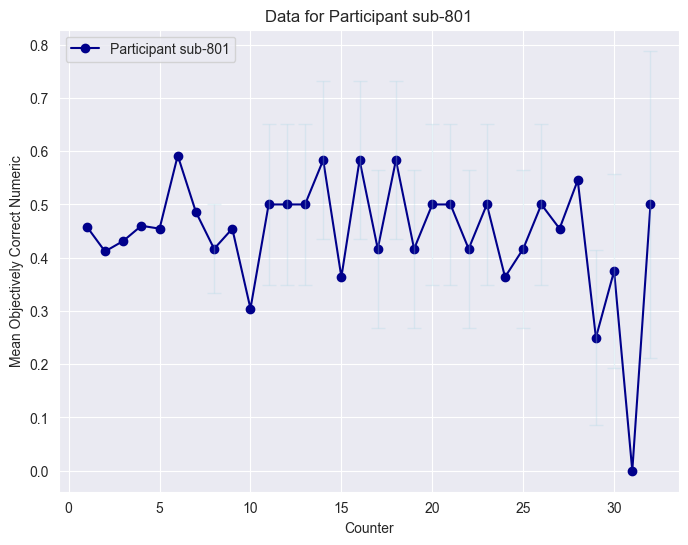

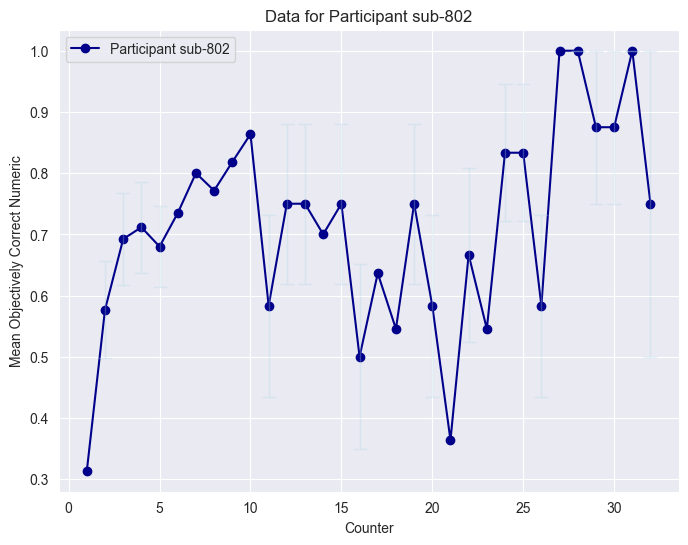

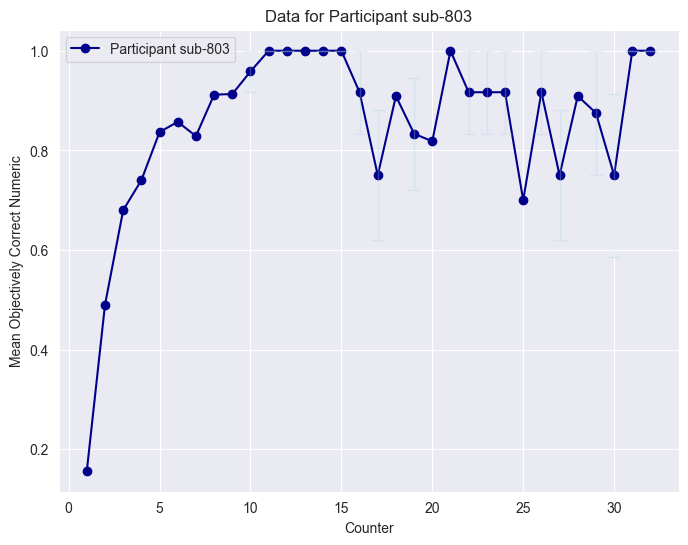

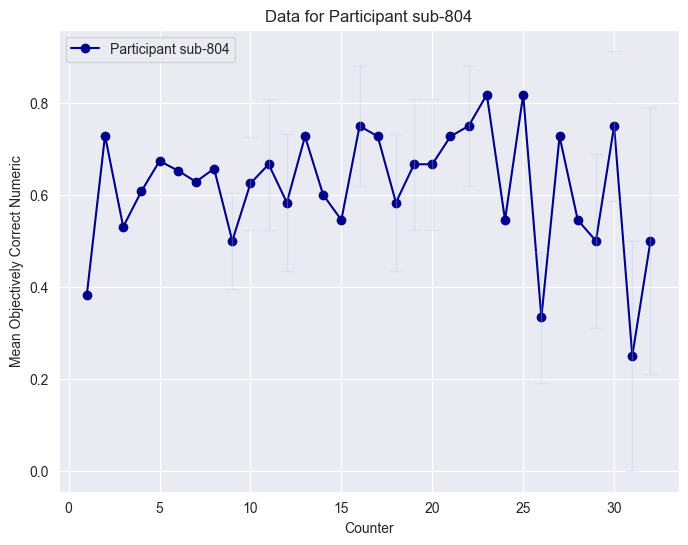

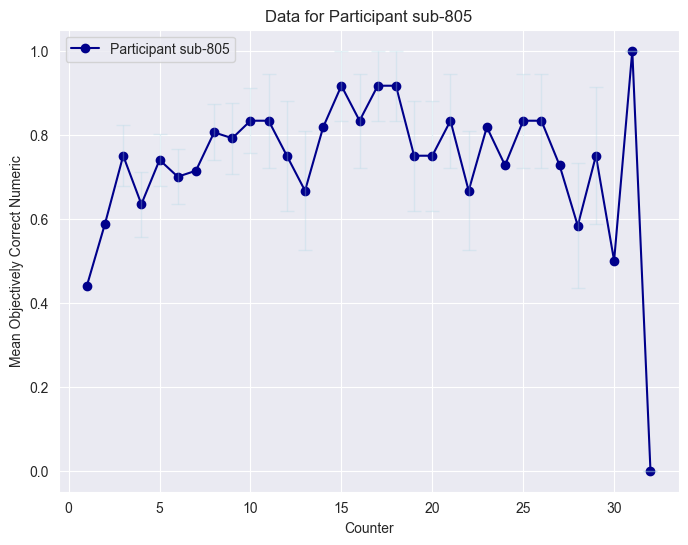

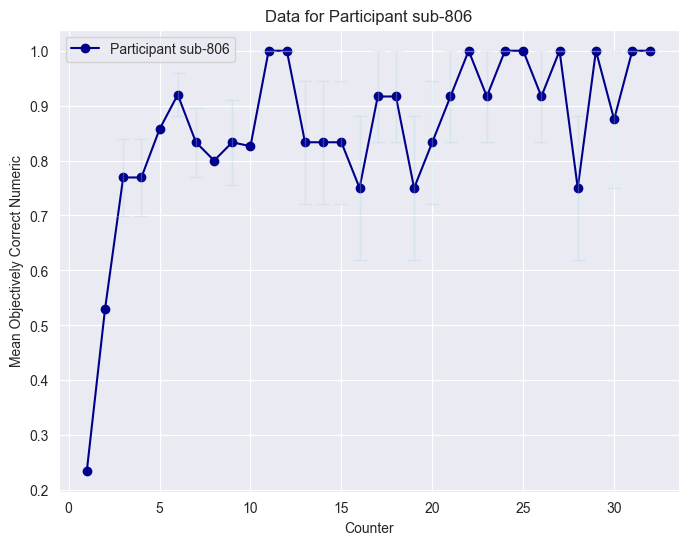

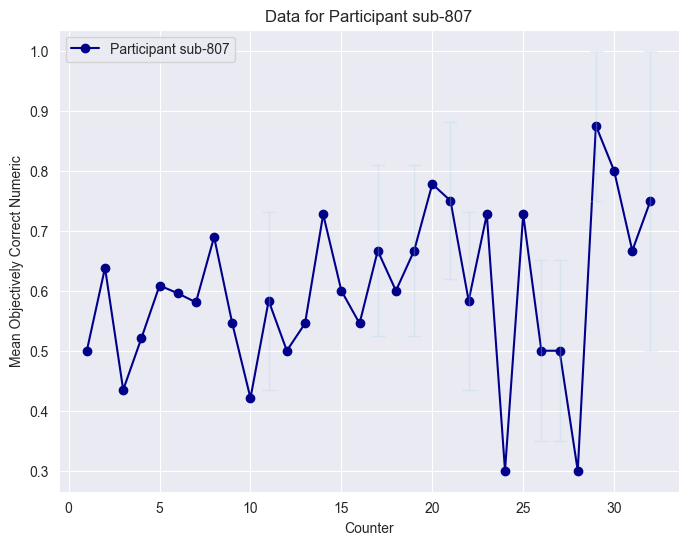

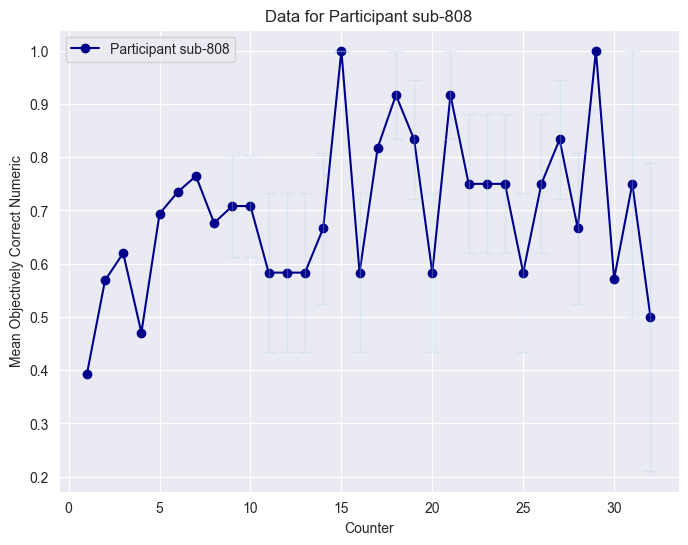

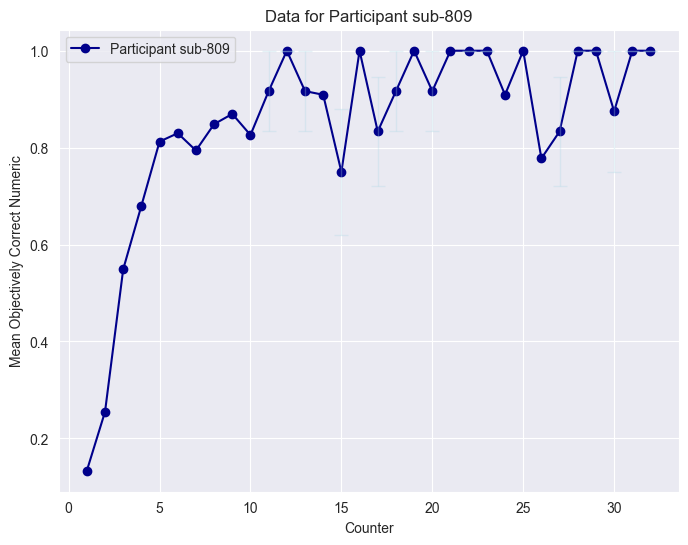

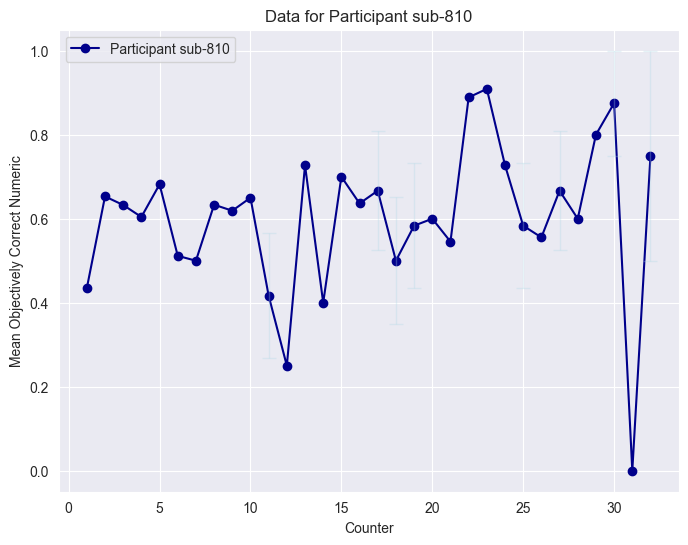

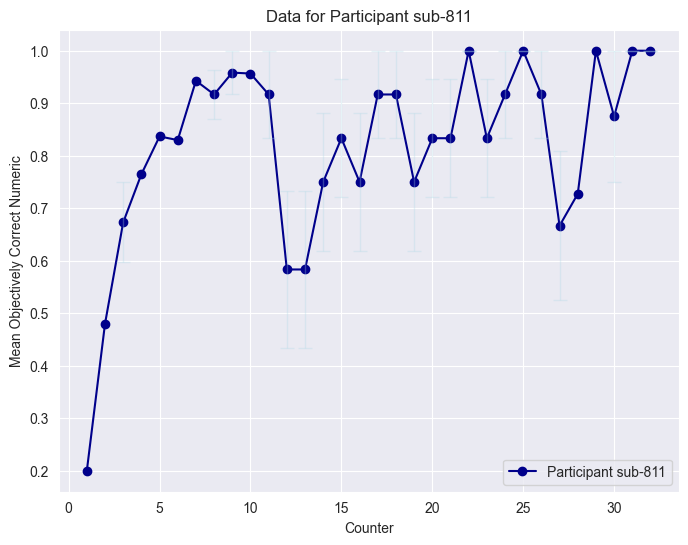

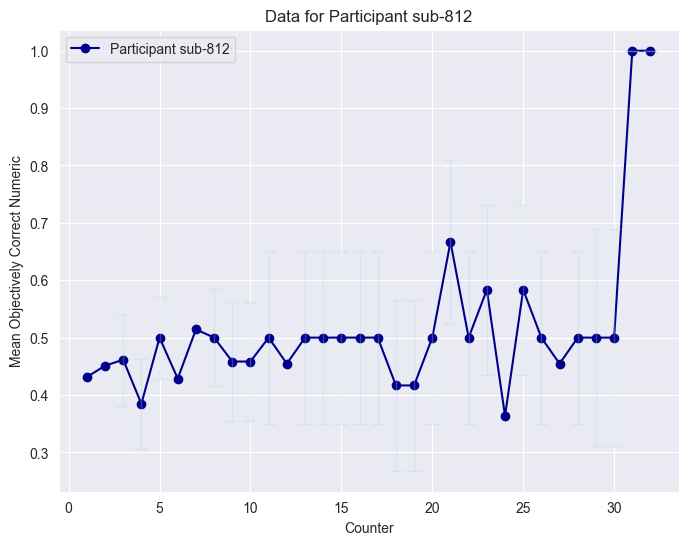

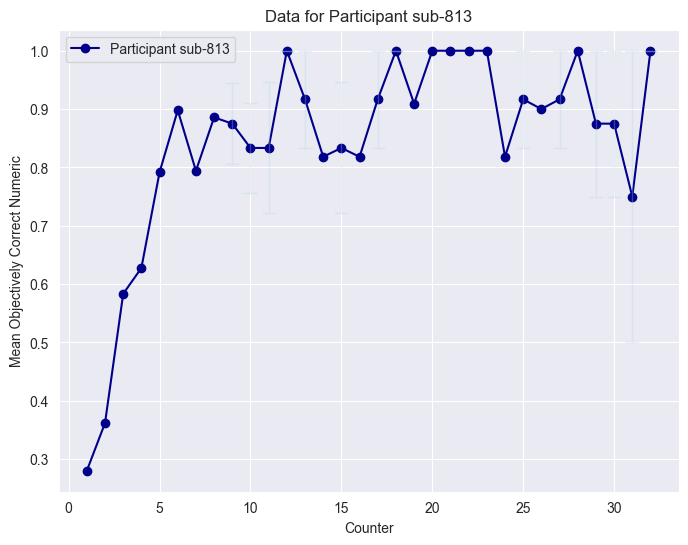

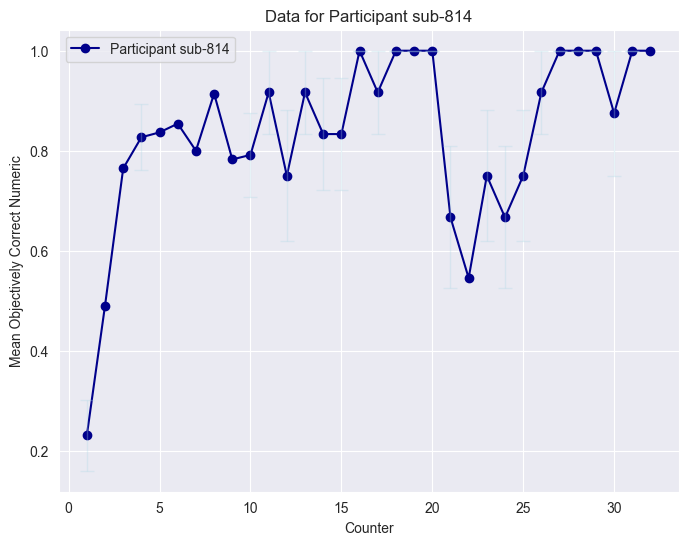

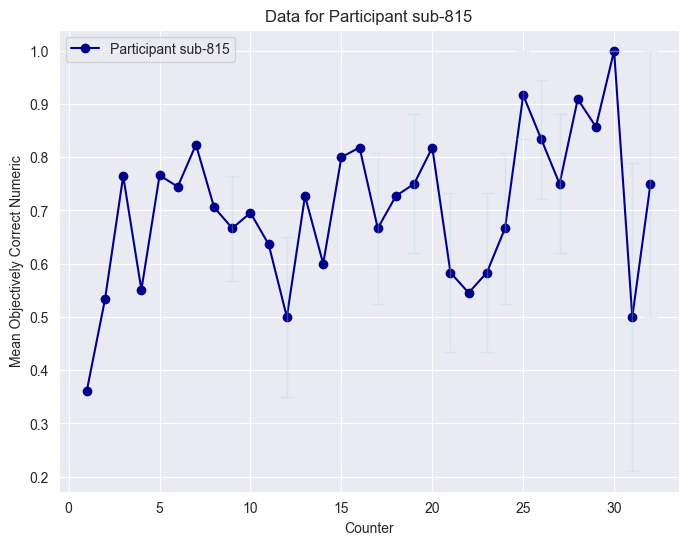

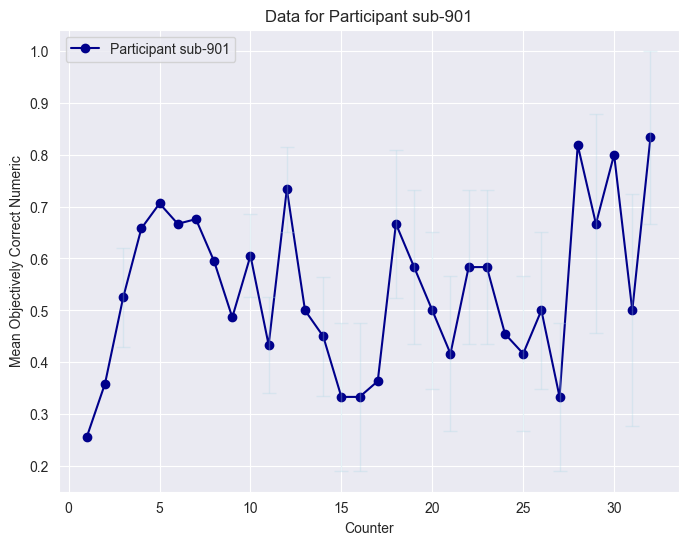

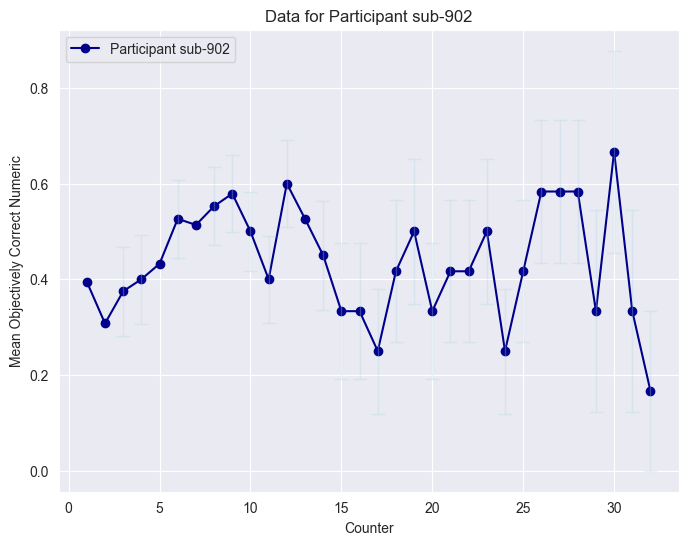

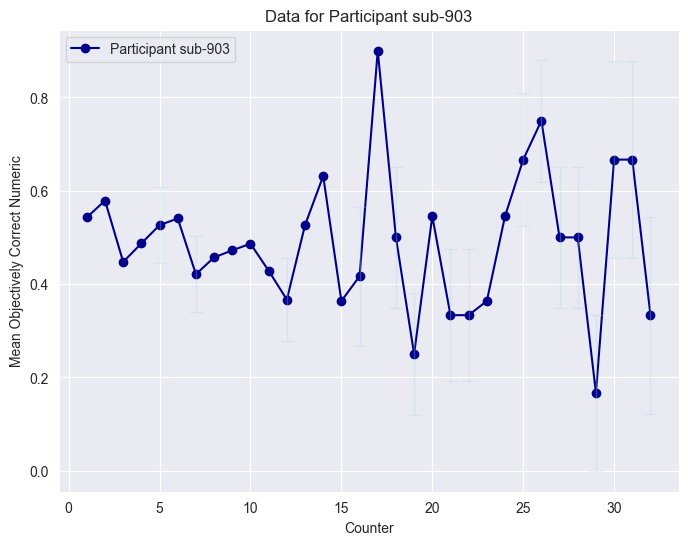

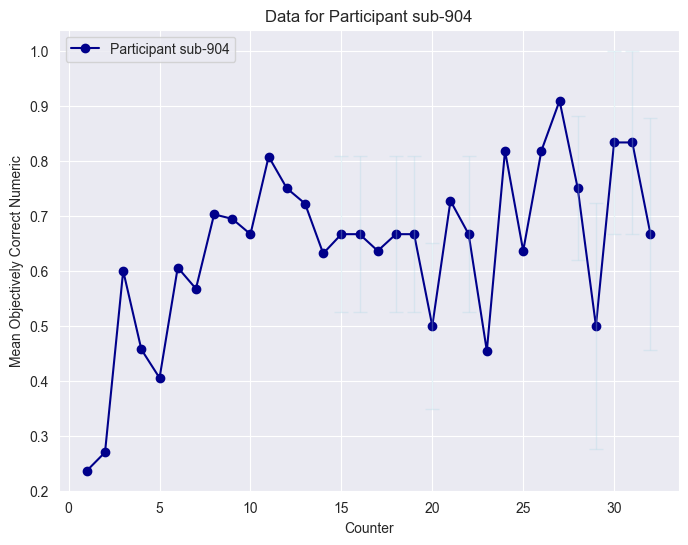

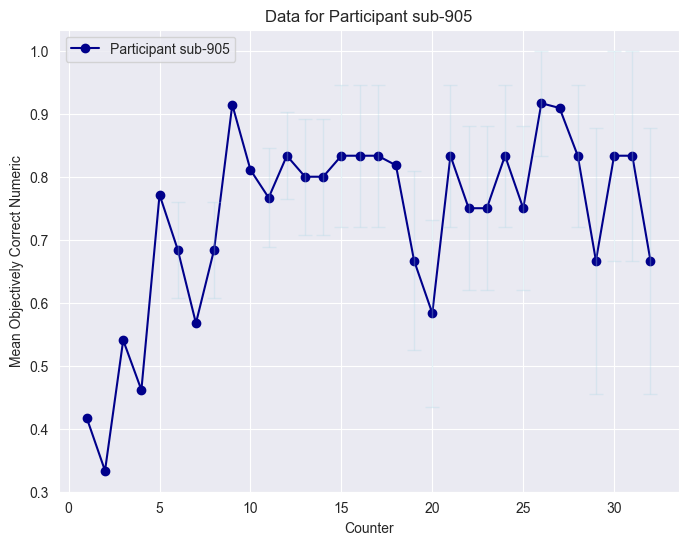

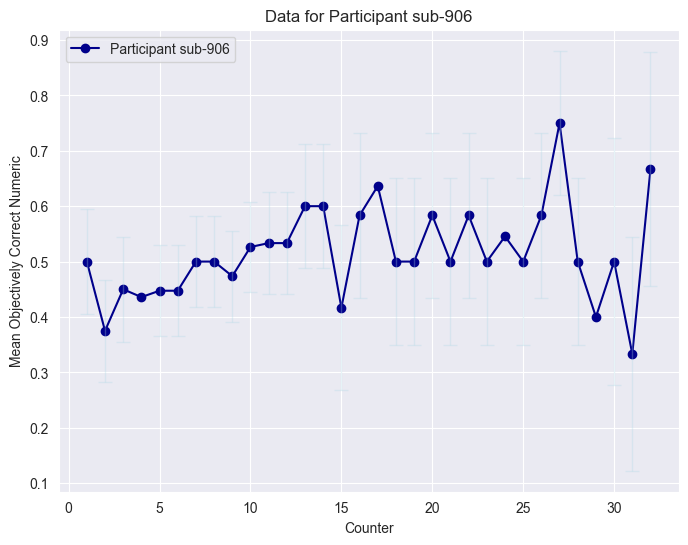

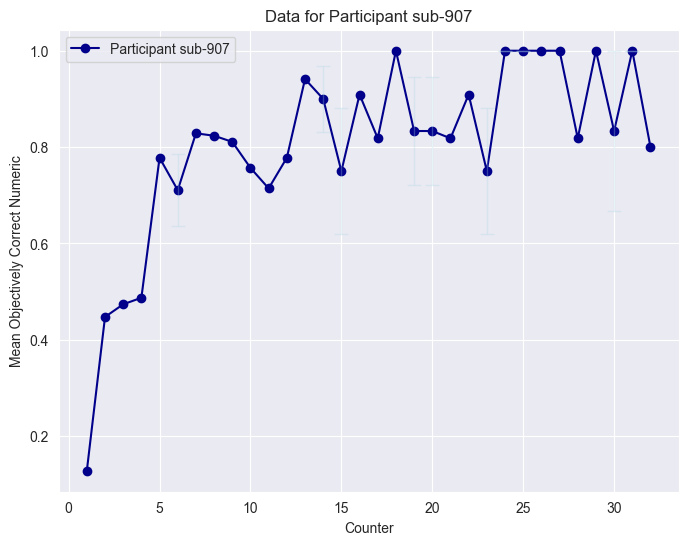

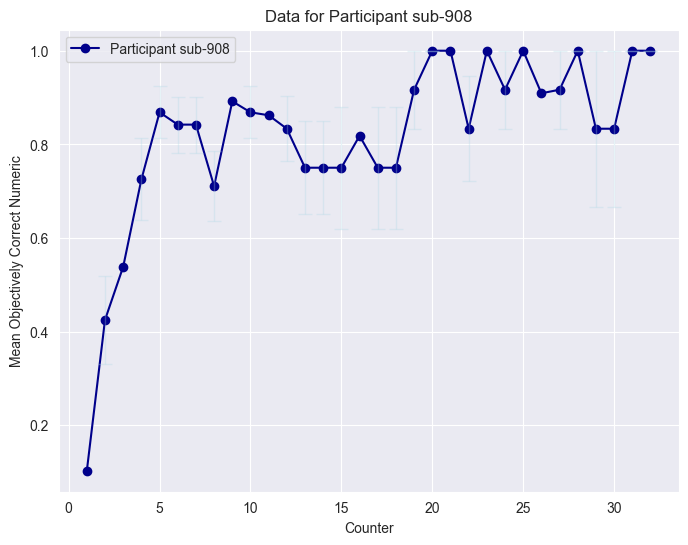

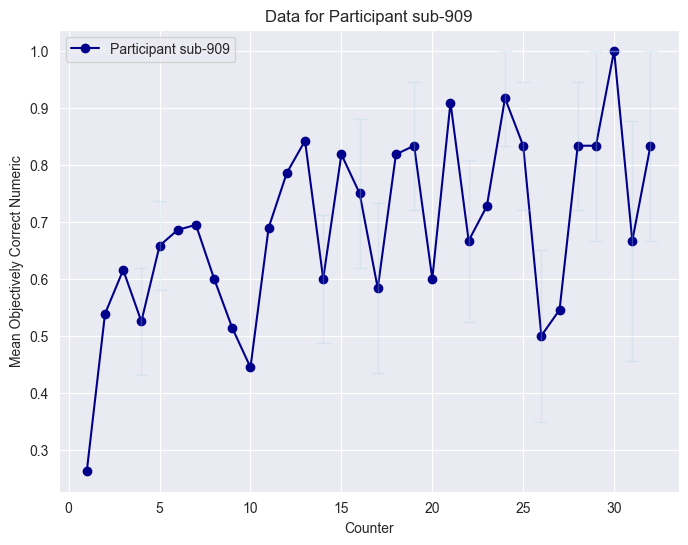

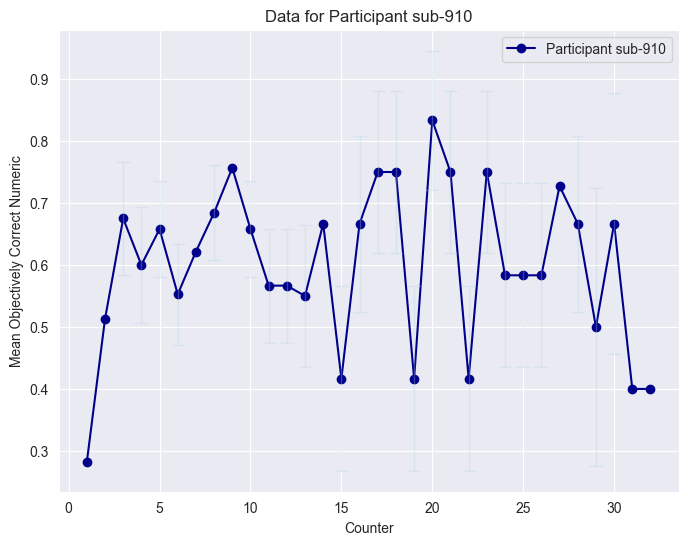

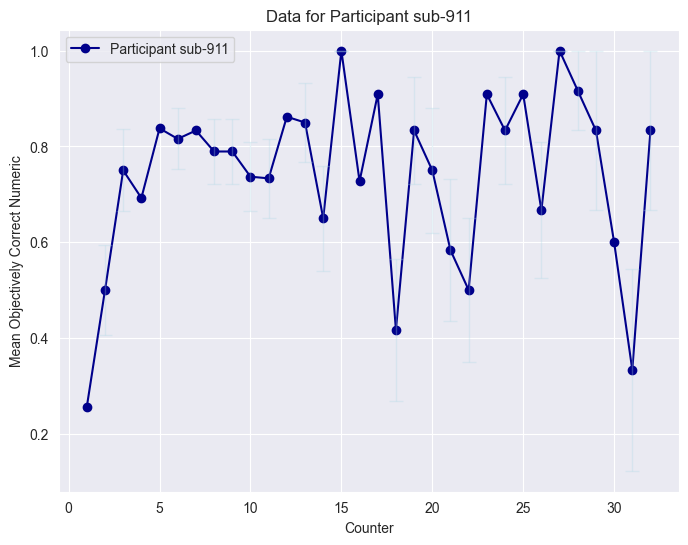

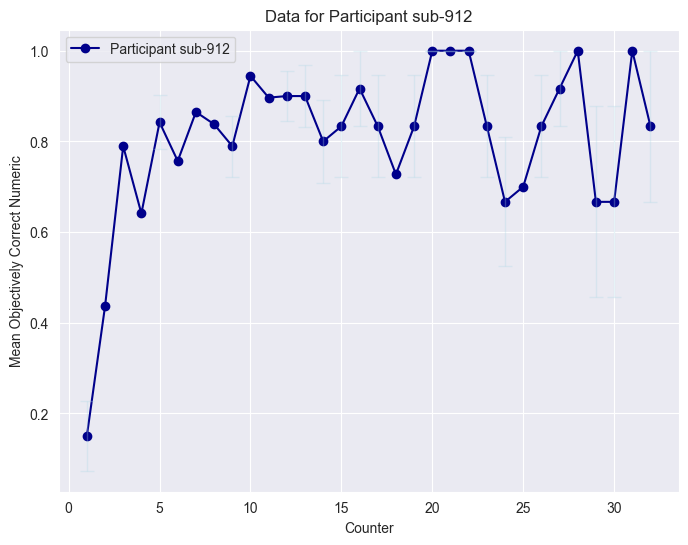

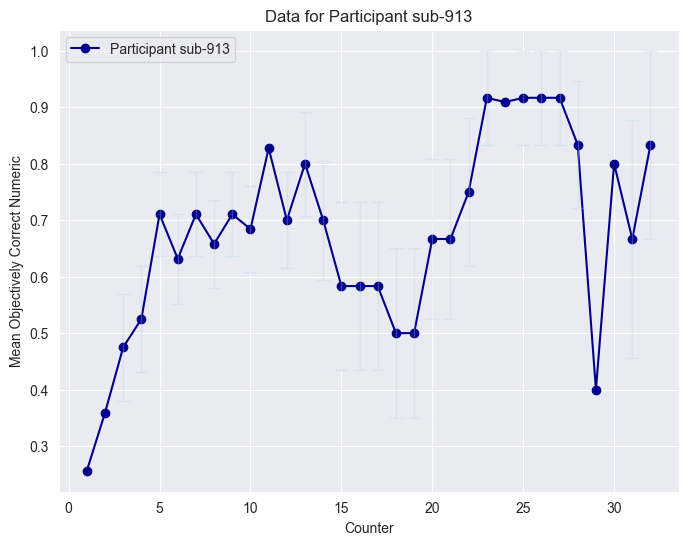

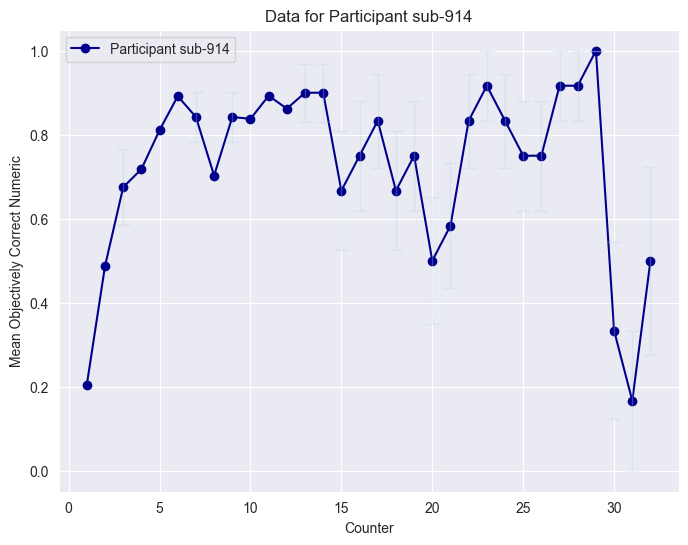

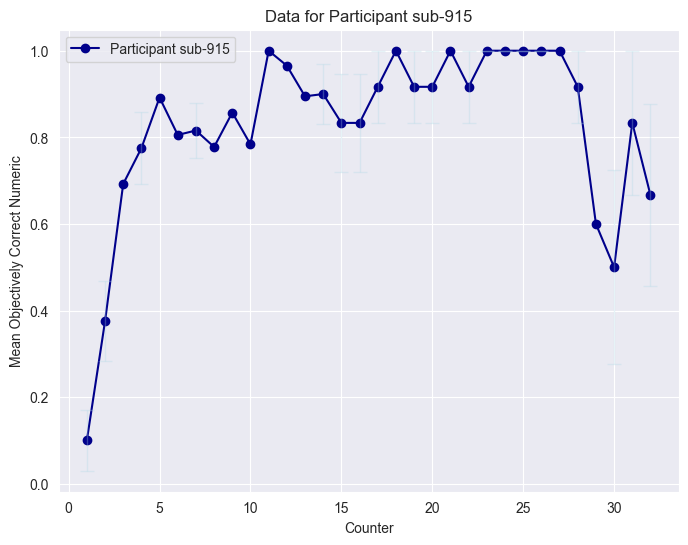

In [13]:

#put SEM as a backgroup rather than solid line and color 
for participant in participants:
    # Filter data for the current participant
    participant_data = mean_se_df[mean_se_df['participant_id'] == participant]
    plt.figure(figsize=(8, 6))

    # Plot the main line in a dark color with a label for the legend
    plt.plot(
        participant_data['counter'], 
        participant_data['mean'], 
        '-o', 
        color='darkblue',            # Darker color for the main line
        label=f'Participant {participant}'
    )

    # Add faint, transparent error bars without affecting the legend
    plt.errorbar(
        participant_data['counter'], 
        participant_data['mean'], 
        yerr=participant_data['sem'], 
        fmt='none',                  # Skip the main line here, plot only error bars
        ecolor='lightblue',          # Softer color for error bars
        elinewidth=1,                # Error bar width
        alpha=0.3,                   # Lower opacity for error bars
        capsize=5
    )

    plt.title(f'Data for Participant {participant}')
    plt.xlabel('Counter')
    plt.ylabel('Mean Objectively Correct Numeric')
    plt.legend()  # Only the main line is included in the legend
    plt.grid(True)
    plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

# Reshape averages_df to long format if it is in wide format
averages_df_long2 = averages_df.reset_index().melt(id_vars='participant_id', var_name='counter', value_name='objectively_correct_numeric')

# Convert 'counter' to numeric if it is not already (in case it’s treated as string)
averages_df_long2['counter'] = pd.to_numeric(averages_df_long2['counter'], errors='coerce')

# Filter the data to only include counters up to 15
#averages_df_long = averages_df_long[averages_df_long['counter'] <= 15]
averages_df_long2['counter'] = pd.to_numeric(averages_df_long2['counter'], errors='coerce')
averages_df_long2 = averages_df_long2[averages_df_long2['counter'] <= 15]
# Calculate the mean and SEM for each participant and counter

# Loop through each participant and plot
participants = averages_df_long2['participant_id'].unique()


#sem = sem(averages_df_long2['objectively_correct_numeric'].dropna()) * 100 
print(averages_df_long2)
#output_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/averages_df_long2.csv'
#averages_df_long2.to_csv(output_path, index=False, sep=';')


    participant_id  counter  objectively_correct_numeric
0          sub-801        1                     0.458333
1          sub-802        1                     0.313725
2          sub-803        1                     0.156863
3          sub-804        1                     0.382979
4          sub-805        1                     0.440000
..             ...      ...                          ...
445        sub-911       15                     1.000000
446        sub-912       15                     0.833333
447        sub-913       15                     0.583333
448        sub-914       15                     0.666667
449        sub-915       15                     0.833333

[450 rows x 3 columns]


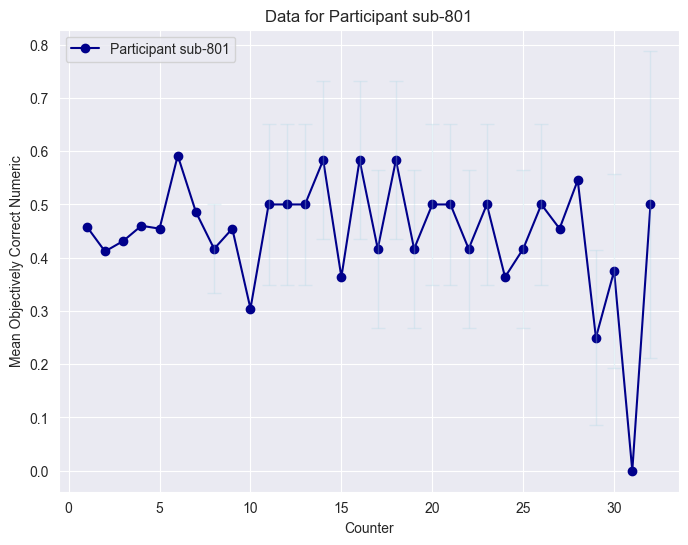

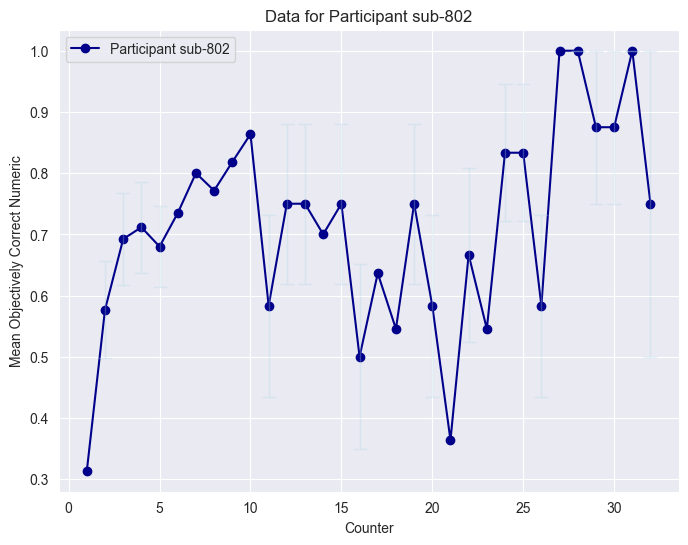

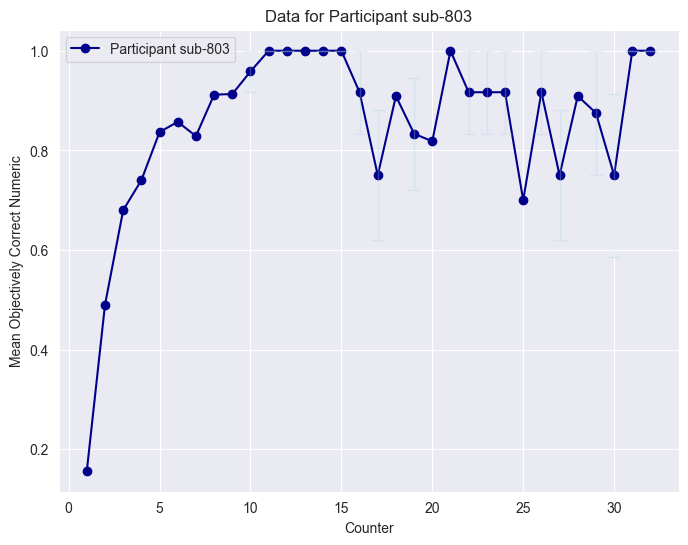

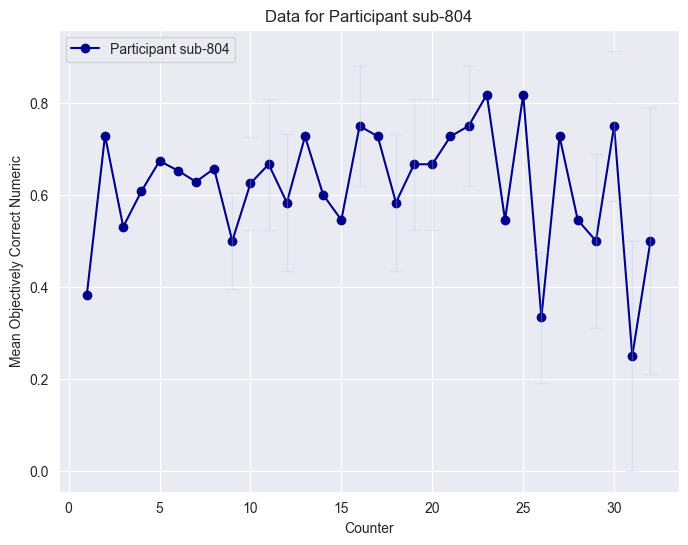

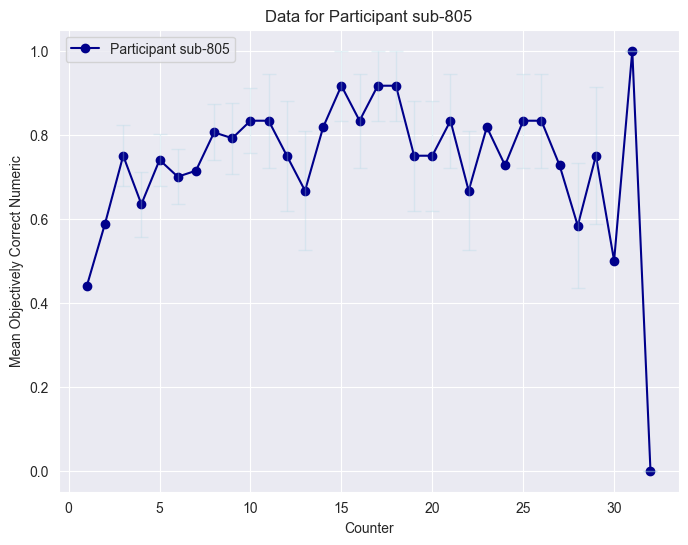

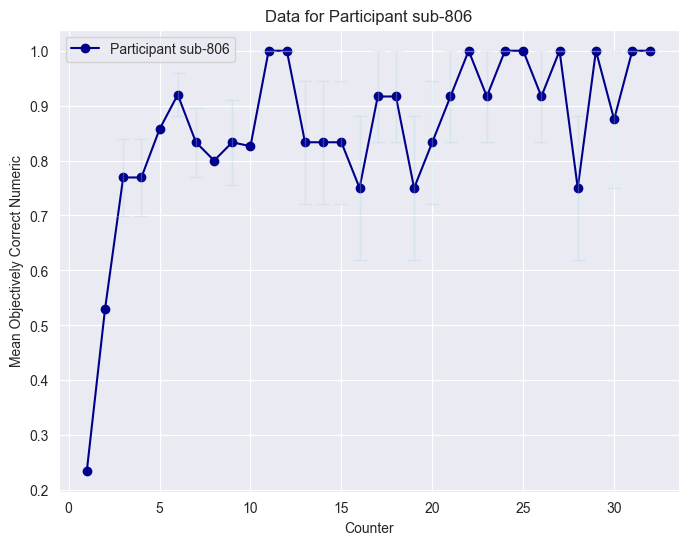

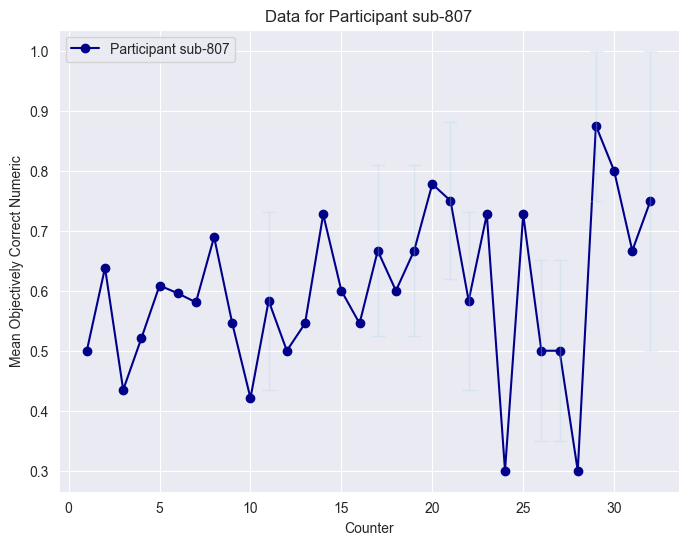

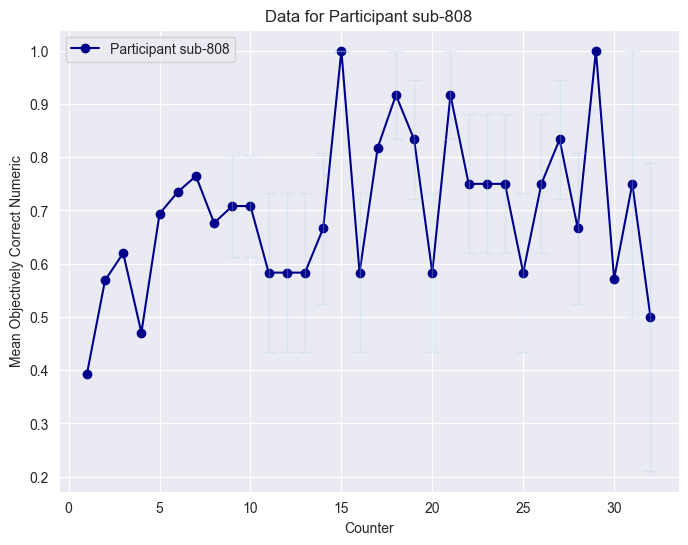

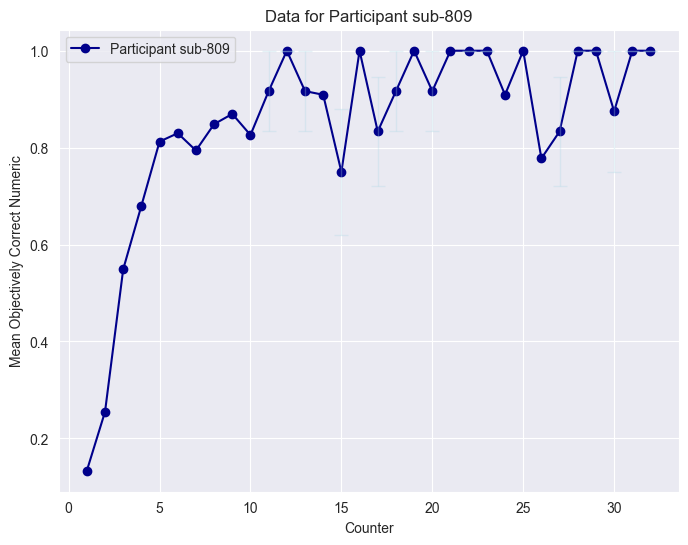

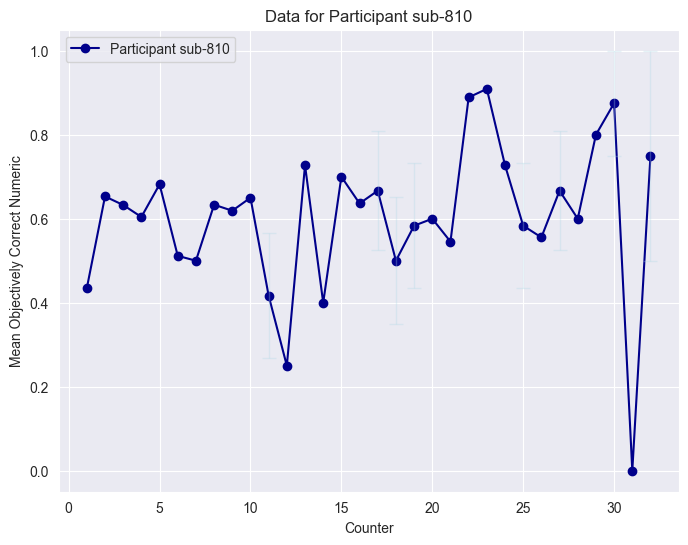

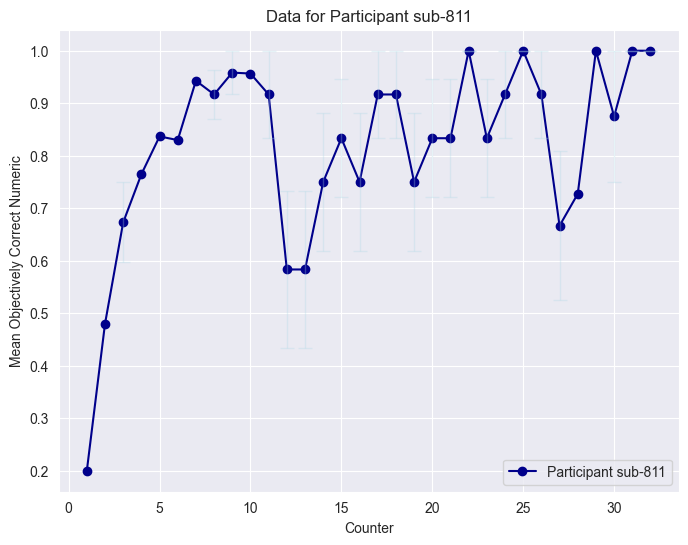

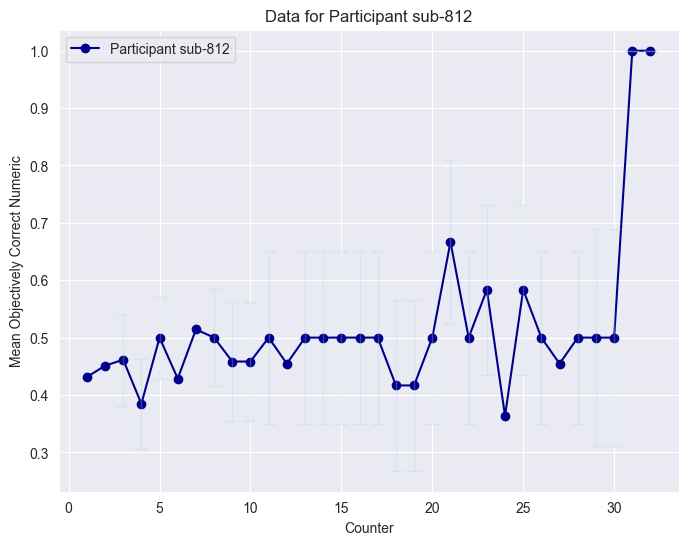

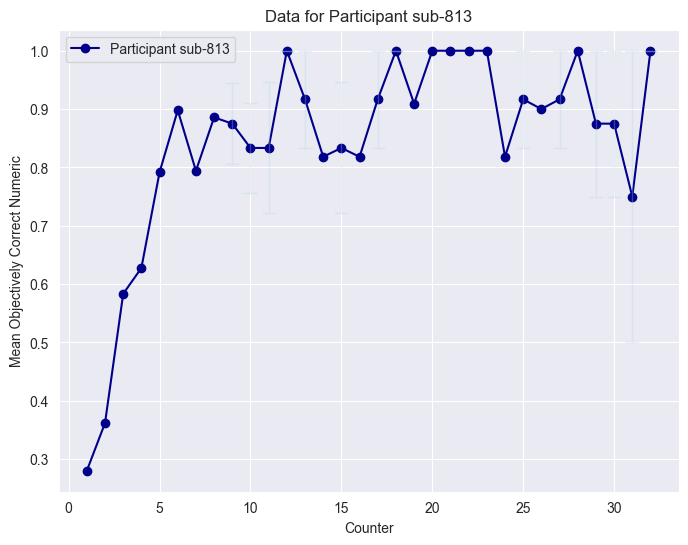

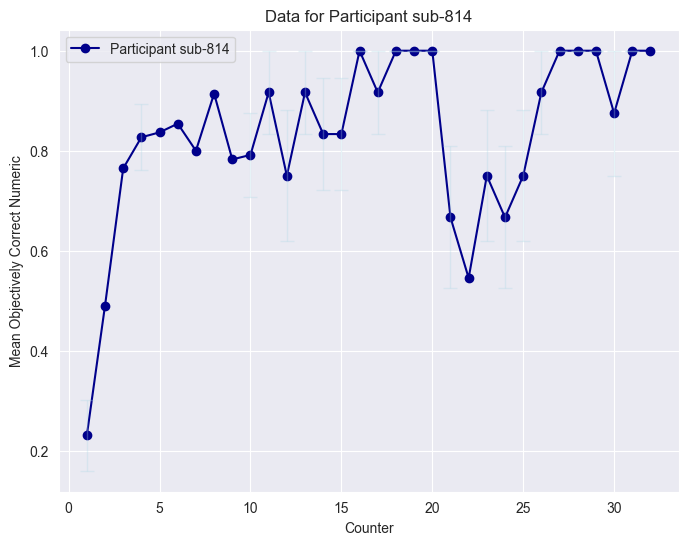

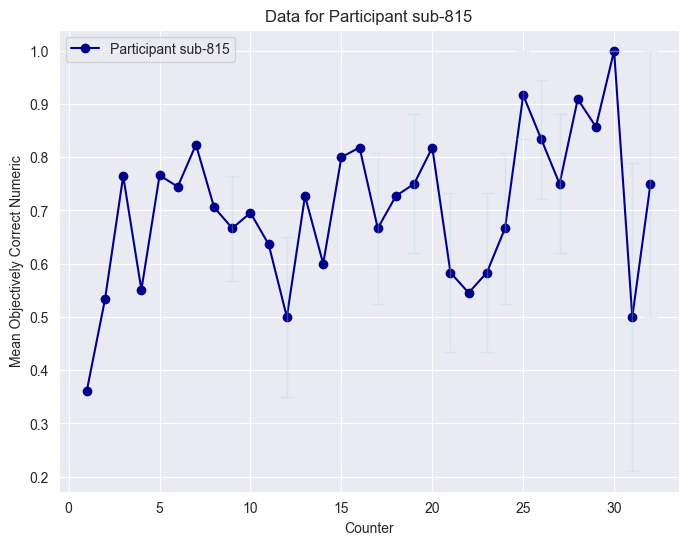

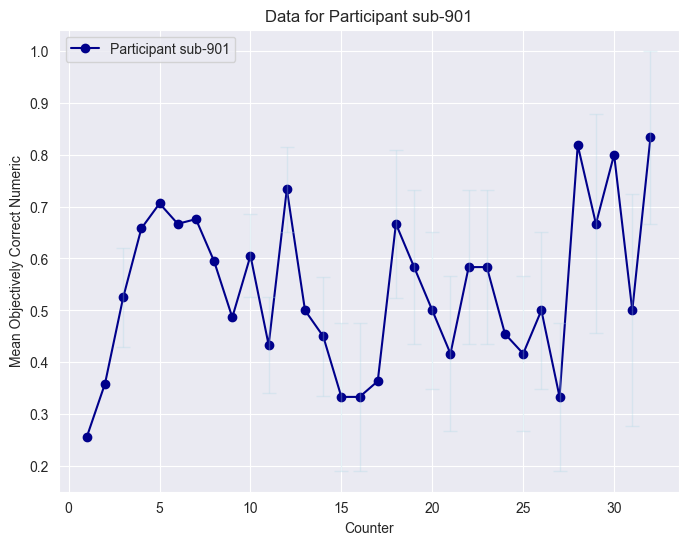

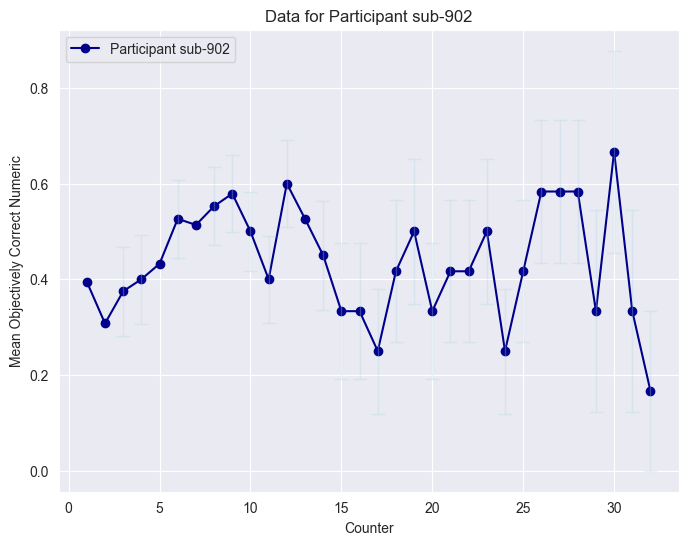

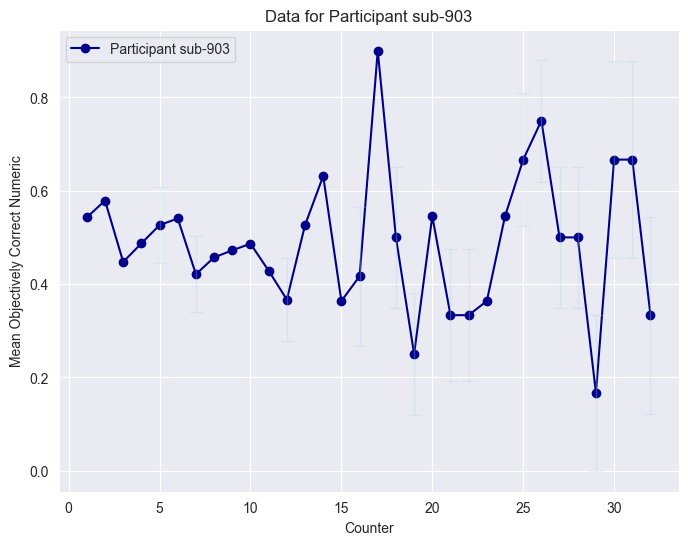

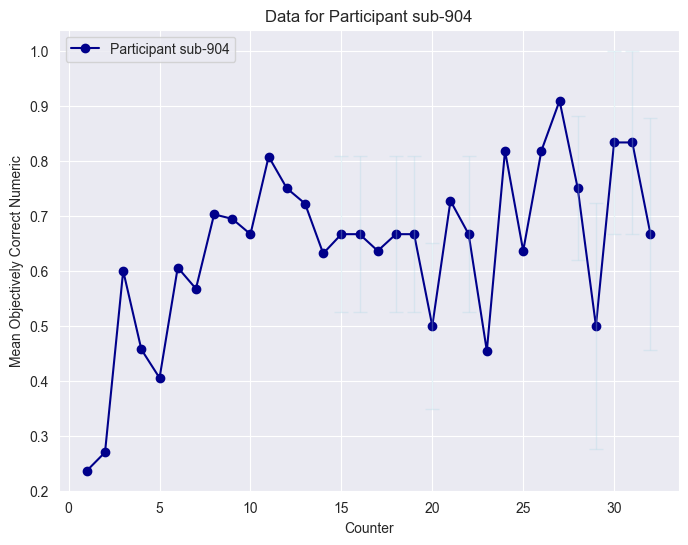

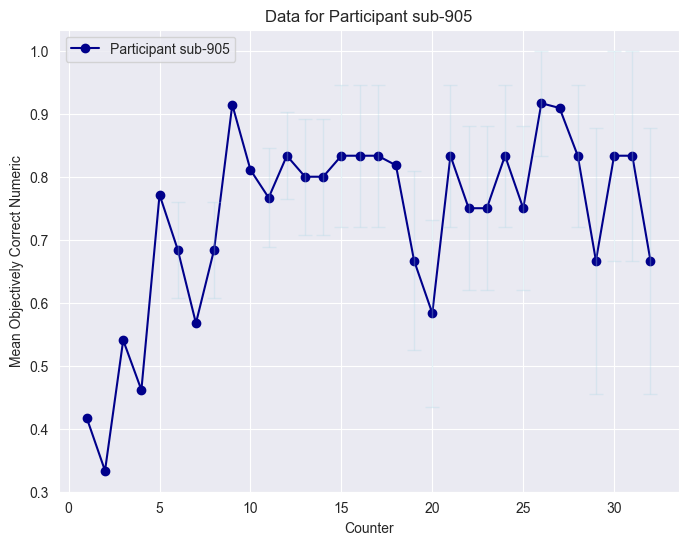

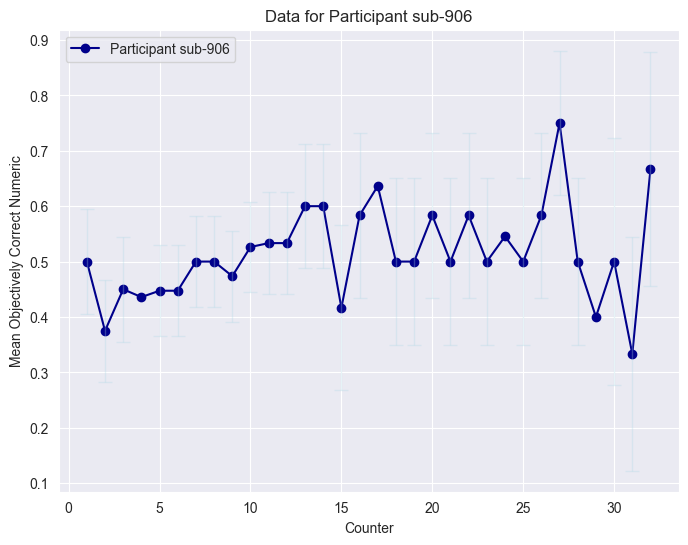

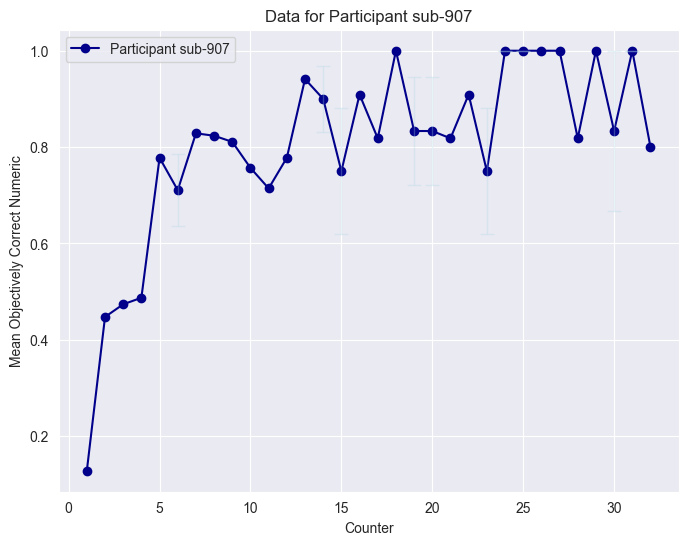

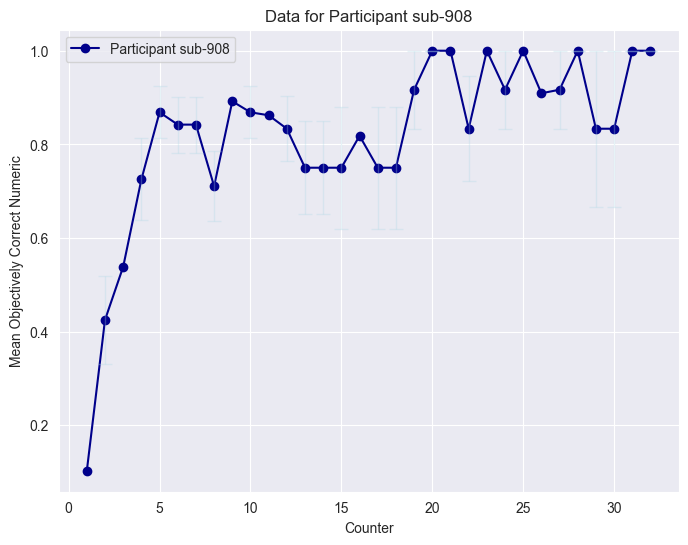

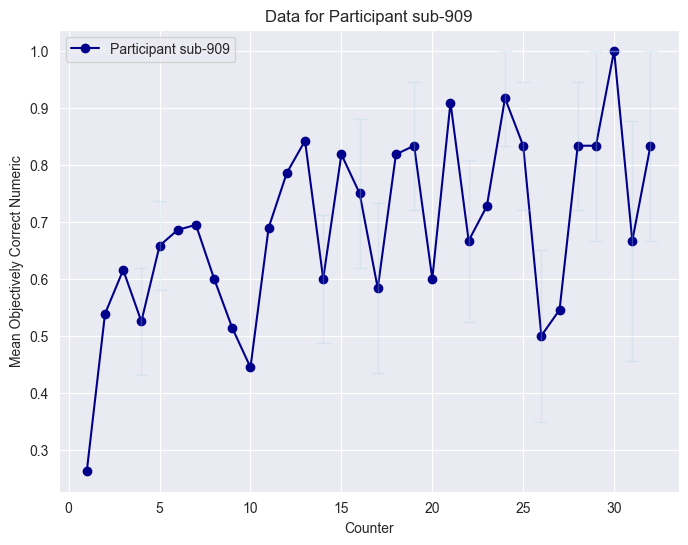

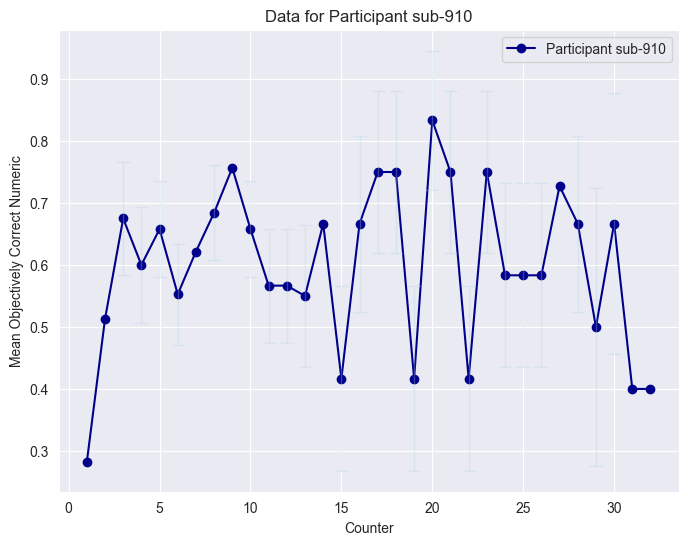

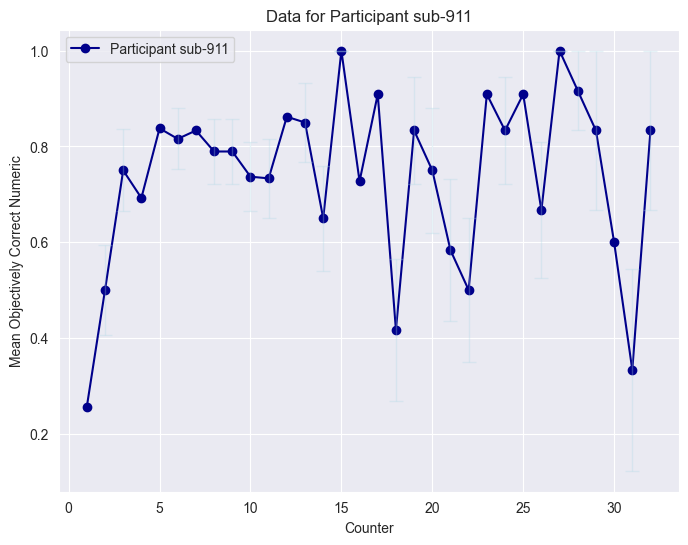

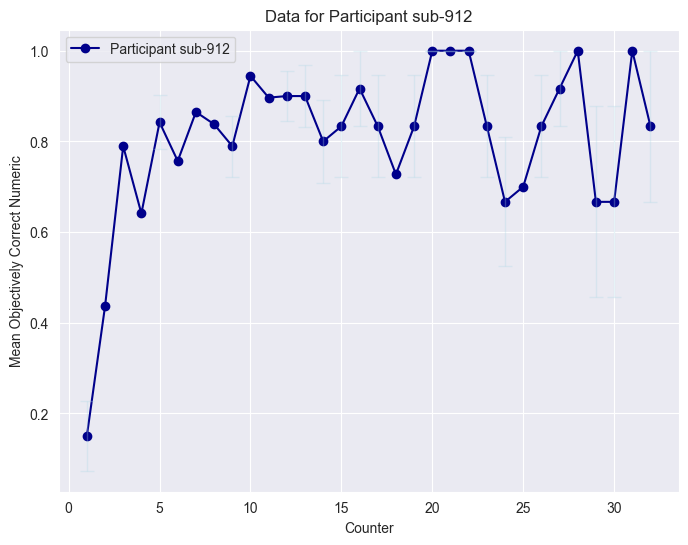

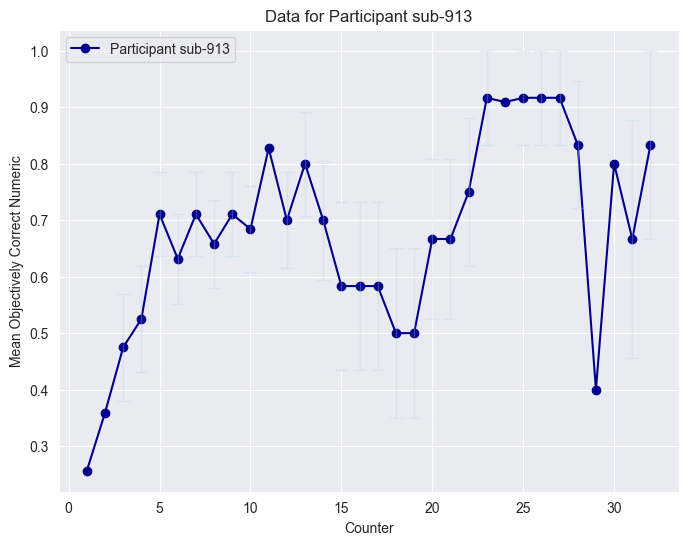

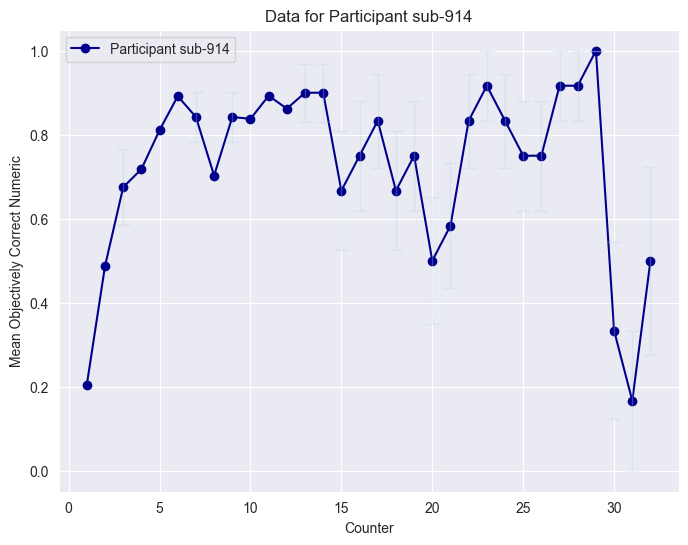

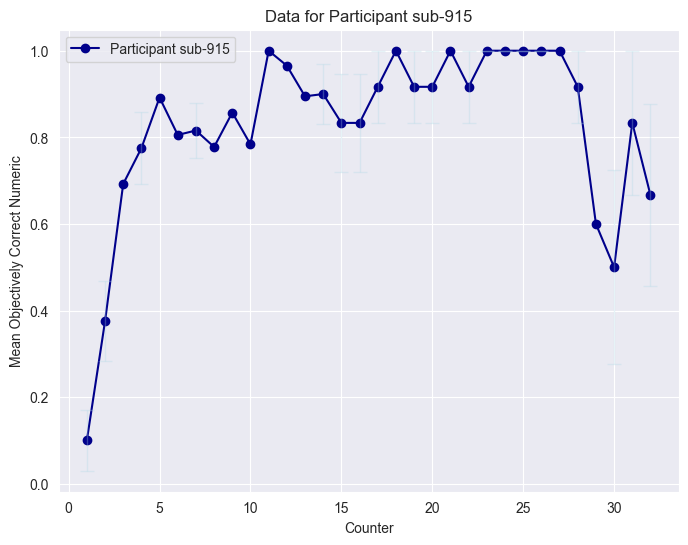

In [15]:

for participant in participants:
    # Filter data for the current participant
    participant_data = mean_se_df[mean_se_df['participant_id'] == participant]
    plt.figure(figsize=(8, 6))

    # Plot the main line in a dark color with a label for the legend
    plt.plot(
        participant_data['counter'], 
        participant_data['mean'], 
        '-o', 
        color='darkblue',            # Darker color for the main line
        label=f'Participant {participant}'
    )

    # Add faint, transparent error bars without affecting the legend
    plt.errorbar(
        participant_data['counter'], 
        participant_data['mean'], 
        yerr=participant_data['sem'], 
        fmt='none',                  # Skip the main line here, plot only error bars
        ecolor='lightblue',          # Softer color for error bars
        elinewidth=1,                # Error bar width
        alpha=0.3,                   # Lower opacity for error bars
        capsize=5
    )

    plt.title(f'Data for Participant {participant}')
    plt.xlabel('Counter')
    plt.ylabel('Mean Objectively Correct Numeric')
    plt.legend()  # Only the main line is included in the legend
    plt.grid(True)
    plt.show()

In [16]:
mean_se_df2 = df_sorted.groupby(['participant_id', 'counter'])['objectively_correct_numeric'].agg(['mean', sem]).reset_index()  
mean_se_df2 = mean_se_df[mean_se_df['counter'] <= 5]
participants = mean_se_df2['participant_id'].unique()


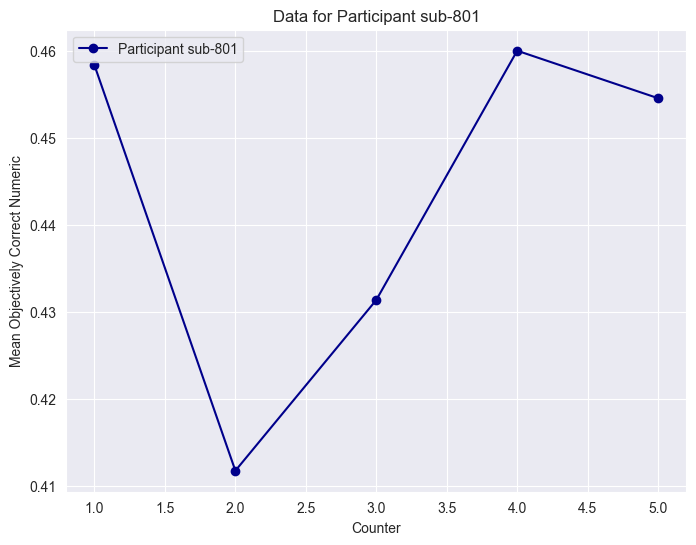

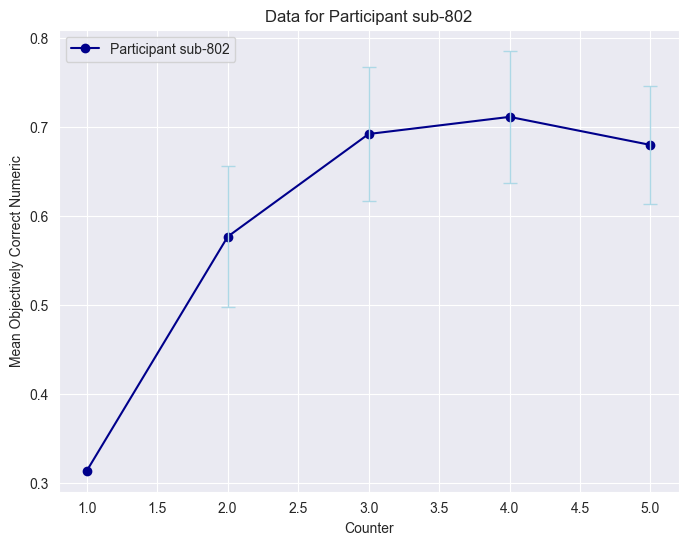

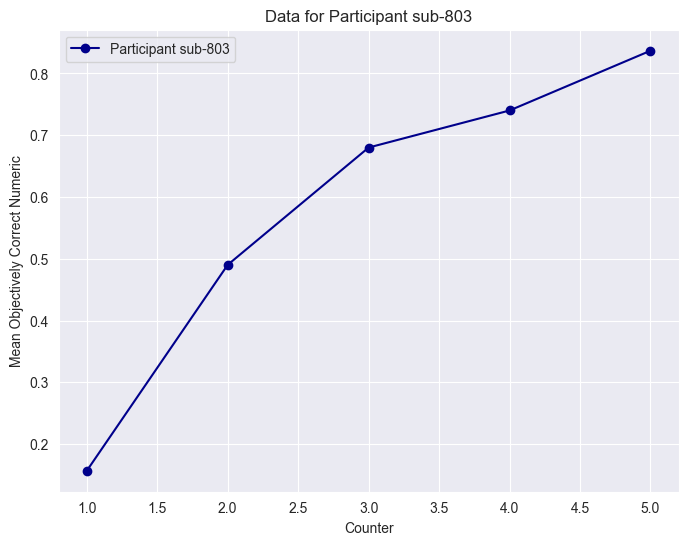

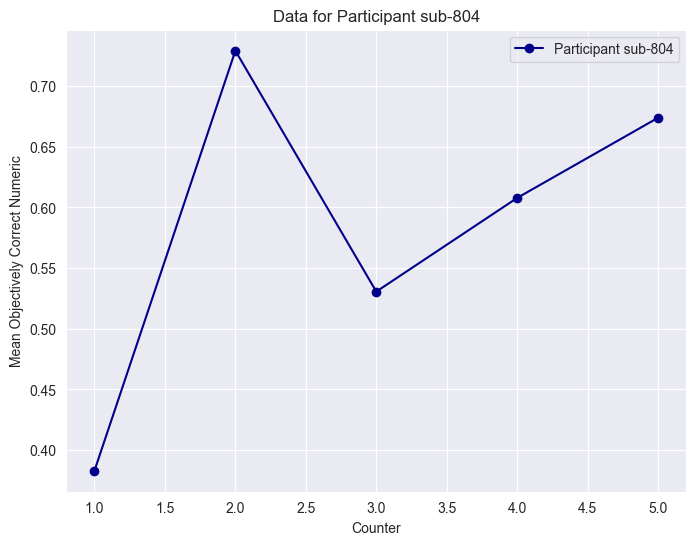

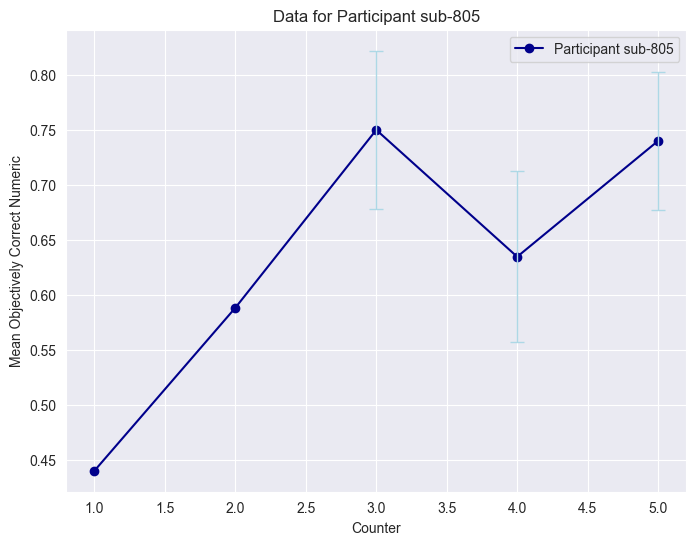

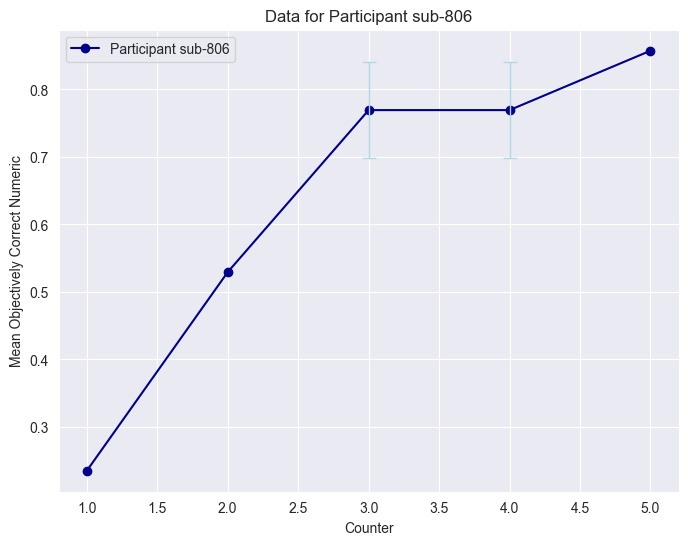

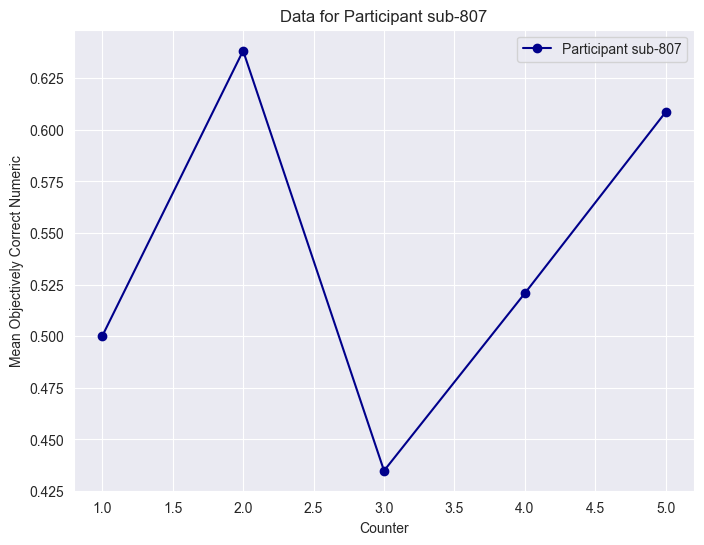

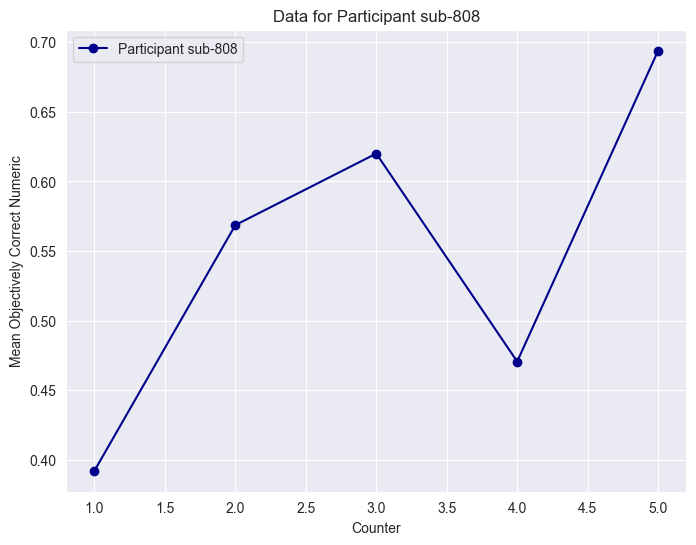

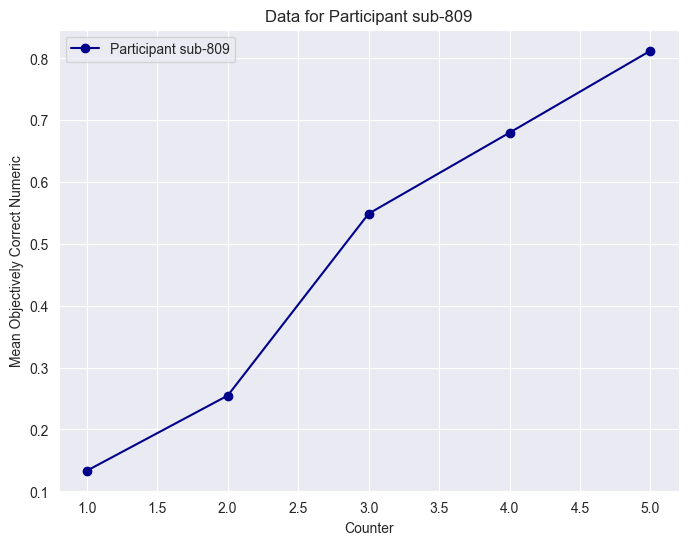

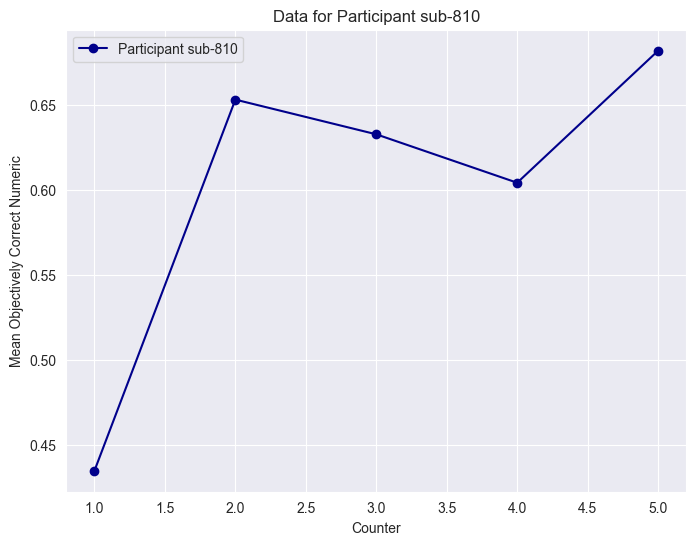

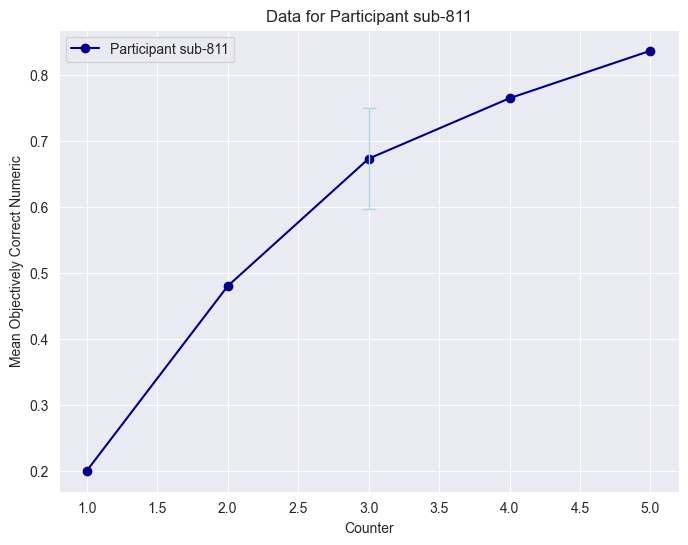

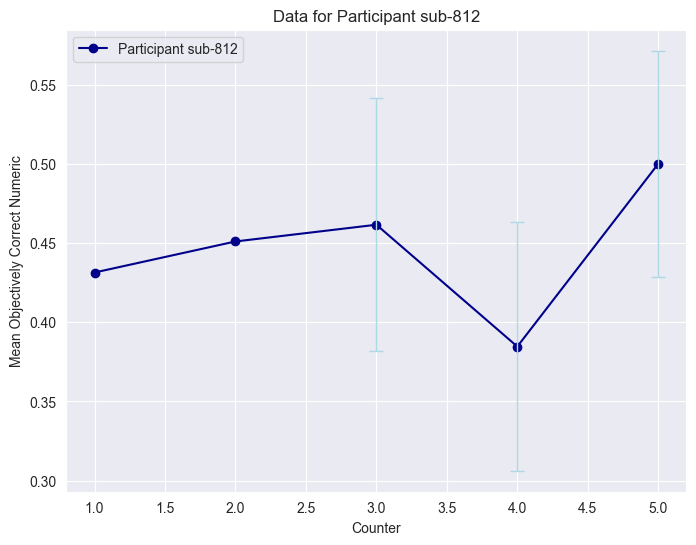

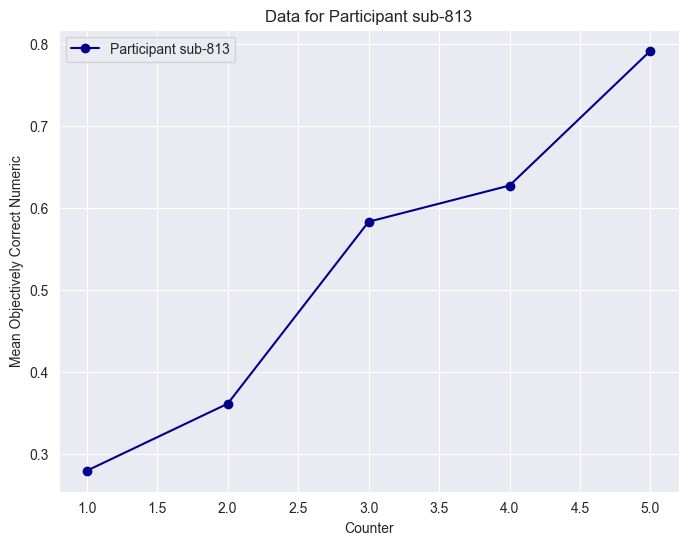

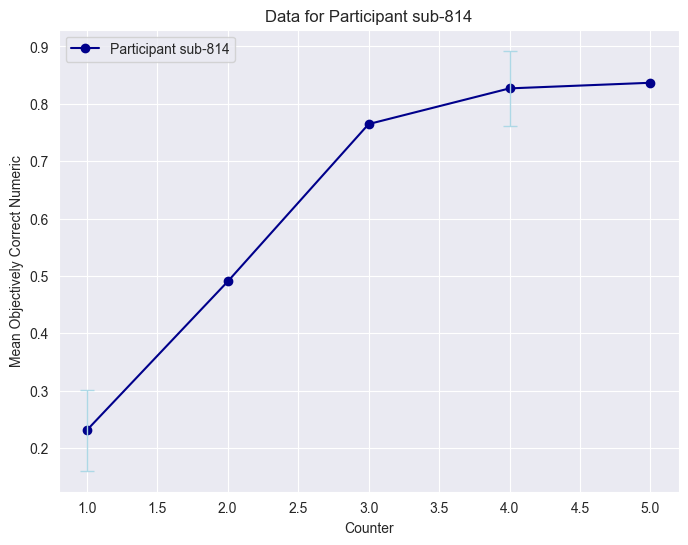

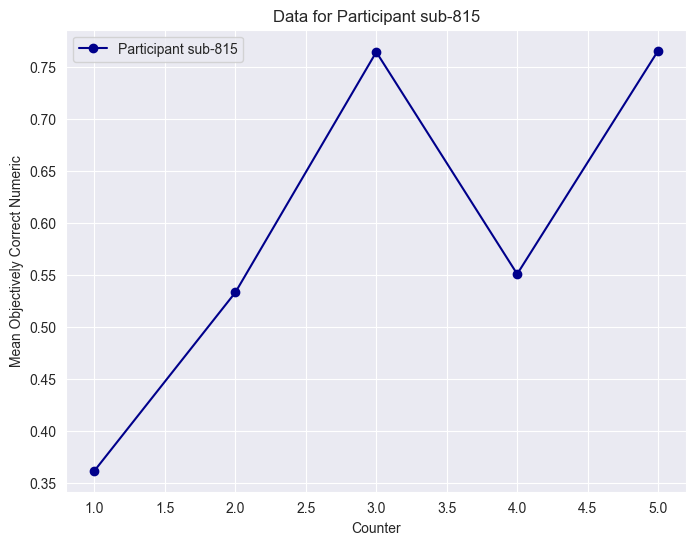

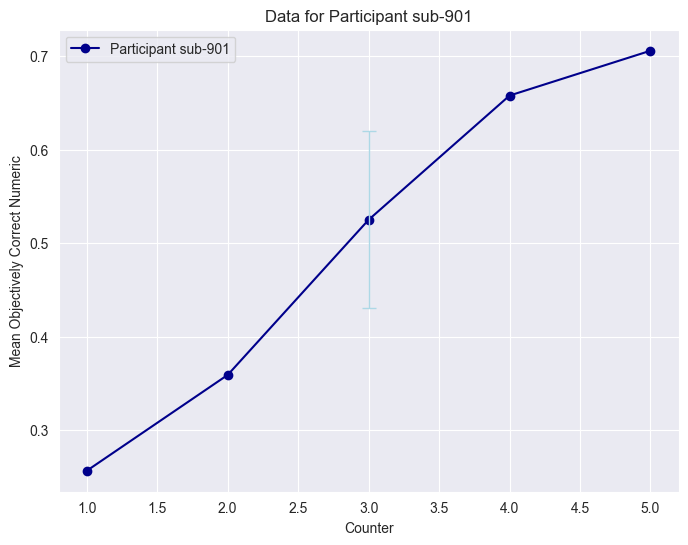

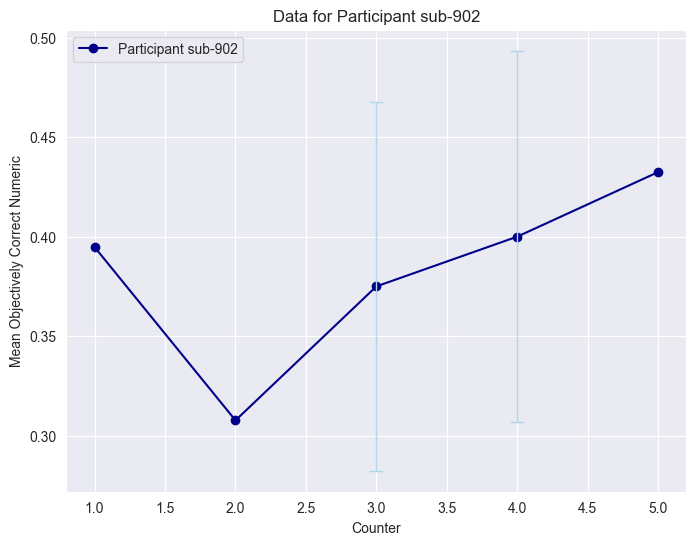

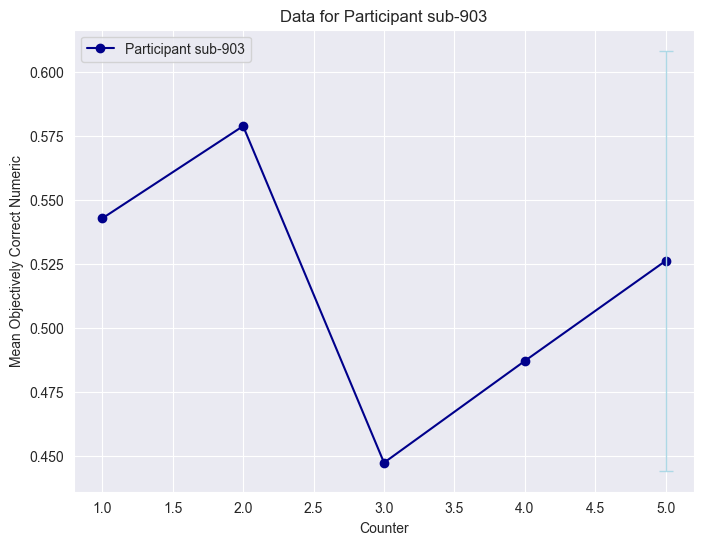

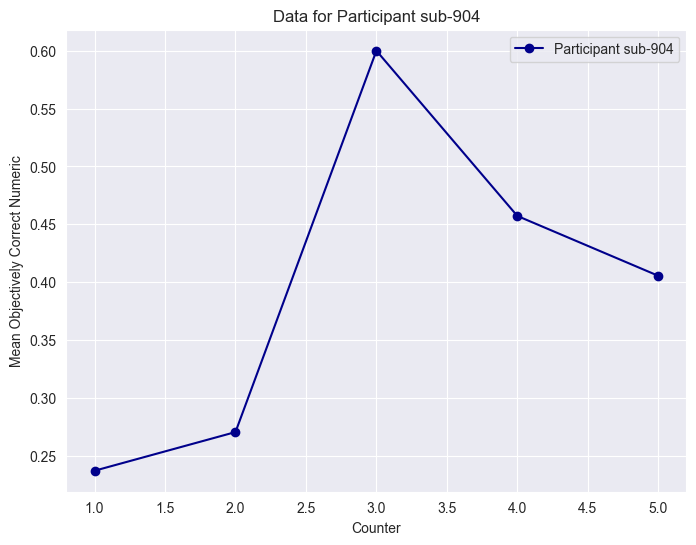

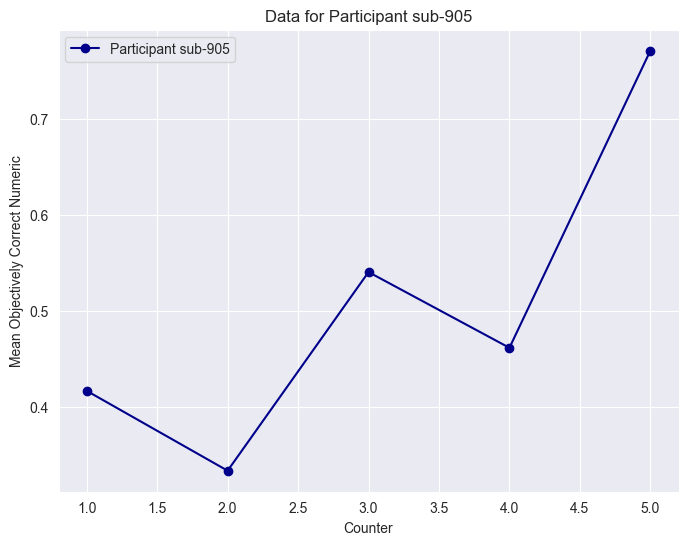

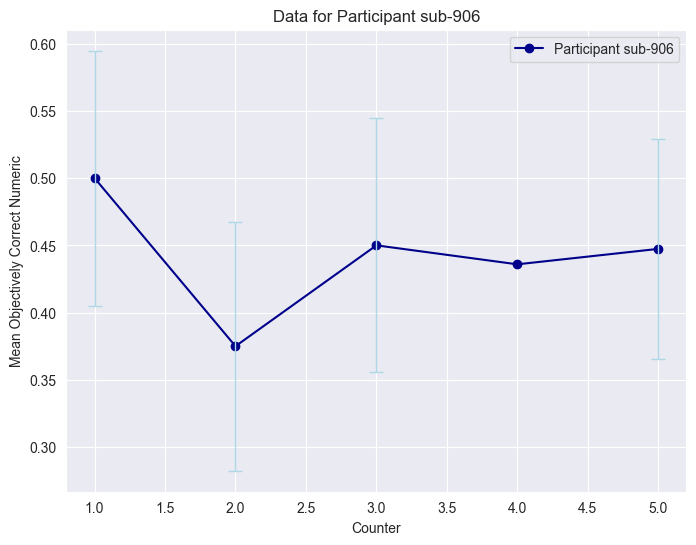

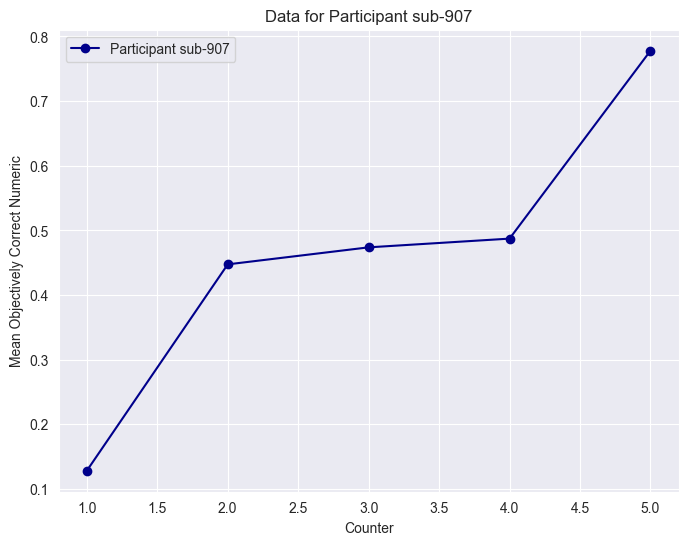

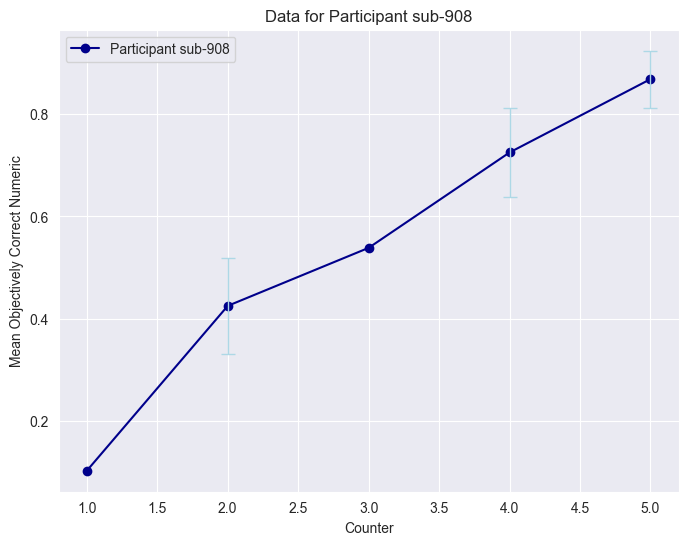

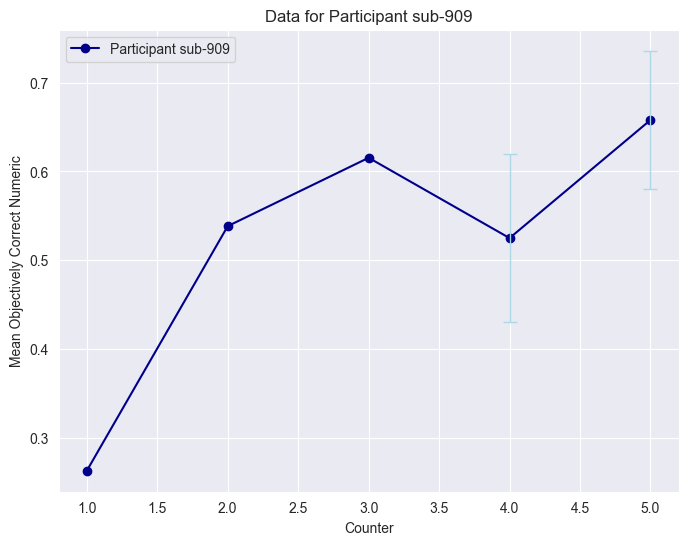

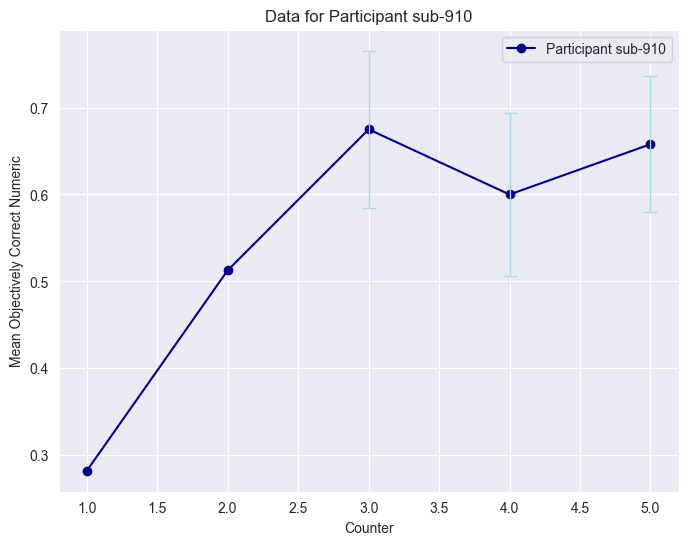

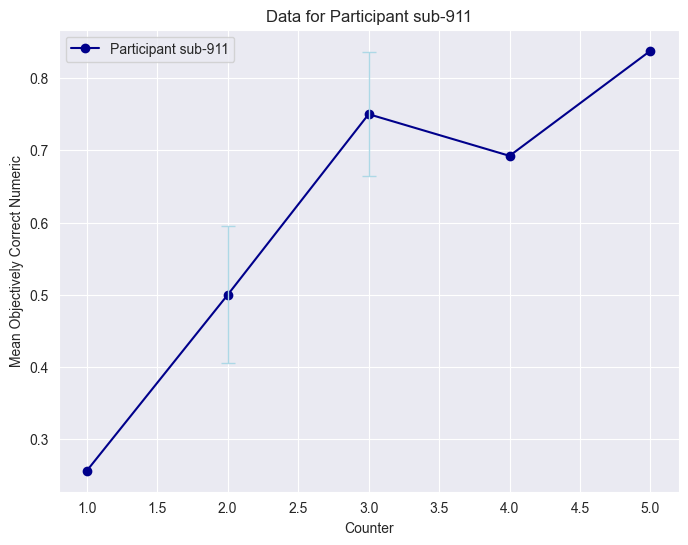

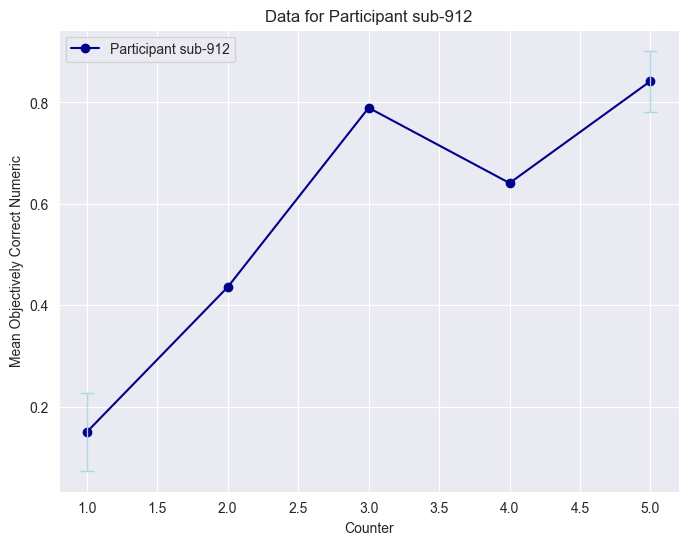

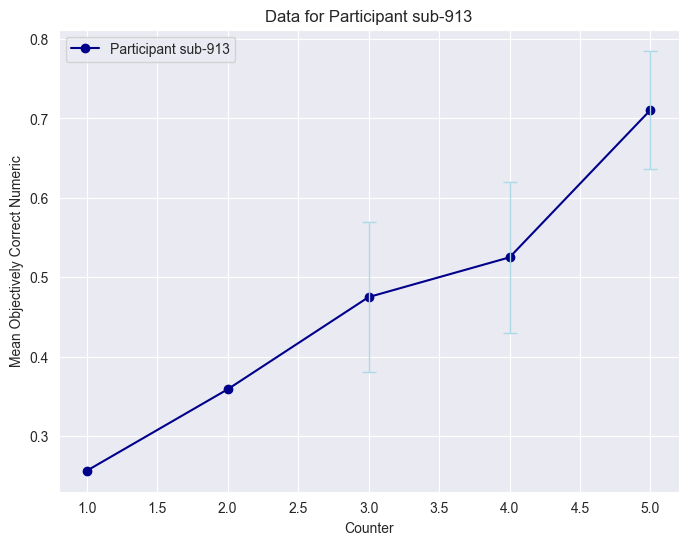

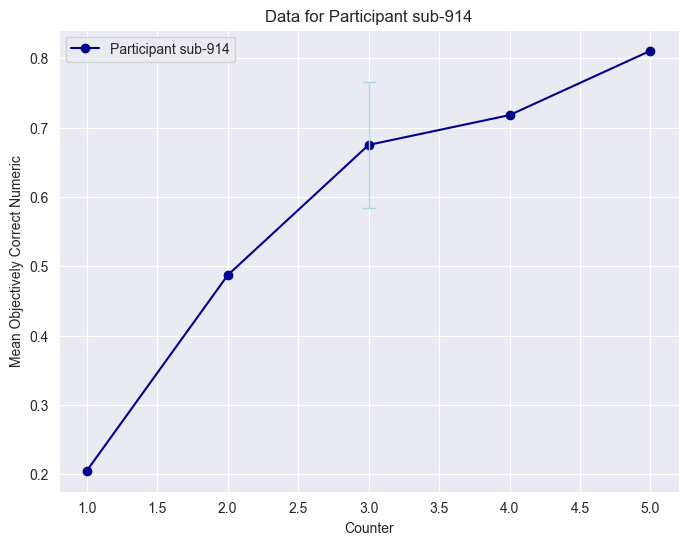

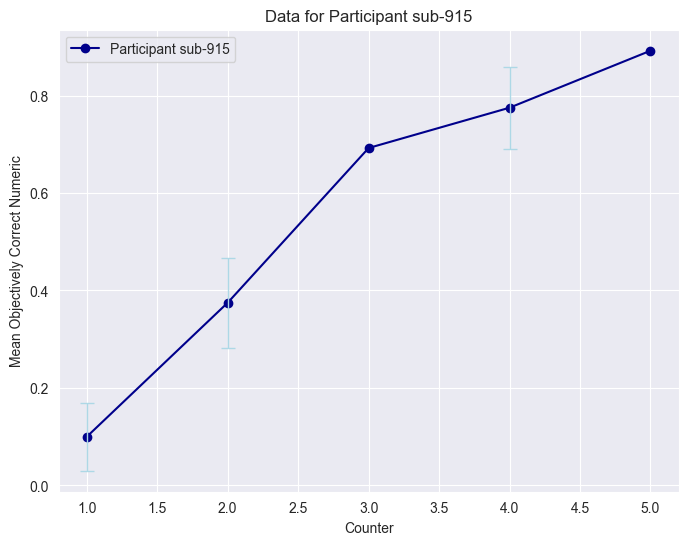

In [17]:
for participant in participants:
    # Filter data for the current participant
    participant_data = mean_se_df2[mean_se_df2['participant_id'] == participant]
    plt.figure(figsize=(8, 6))

    # Plot the main line in a dark color with a label for the legend
    plt.plot(
        participant_data['counter'], 
        participant_data['mean'], 
        '-o', 
        color='darkblue',            # Darker color for the main line
        label=f'Participant {participant}'
    )

    # Add faint, transparent error bars without affecting the legend
    plt.errorbar(
        participant_data['counter'], 
        participant_data['mean'], 
        yerr=participant_data['sem'], 
        fmt='none',                  # Skip the main line here, plot only error bars
        ecolor='lightblue',          # Softer color for error bars
        elinewidth=1,                # Error bar width
        alpha=1,                   # Lower opacity for error bars
        capsize=5
    )

    plt.title(f'Data for Participant {participant}')
    plt.xlabel('Counter')
    plt.ylabel('Mean Objectively Correct Numeric')
    plt.legend()  # Only the main line is included in the legend
    plt.grid(True)
    plt.show()


# Display data for all participants in a single plot 

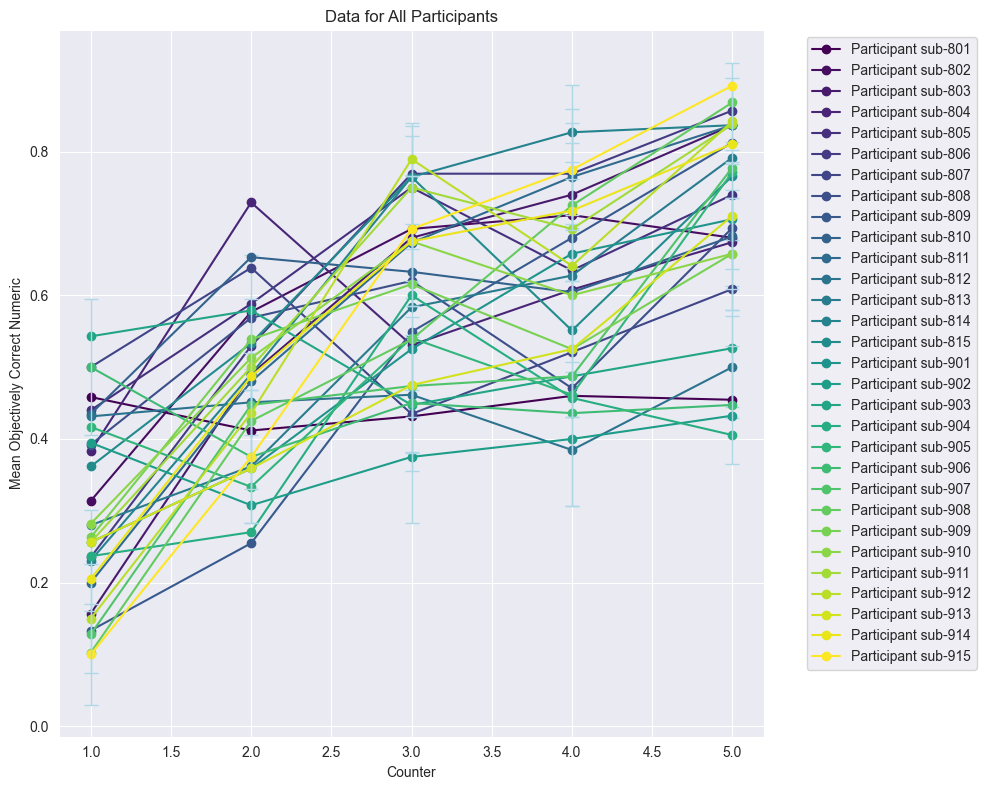

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create a colormap with a number of colors equal to the number of participants
colors = plt.cm.viridis(np.linspace(0, 1, len(participants)))

# Create a figure for all participants
plt.figure(figsize=(10, 8))

for idx, participant in enumerate(participants):
    # Filter data for the current participant
    participant_data = mean_se_df2[mean_se_df2['participant_id'] == participant]

    # Plot the main line in a unique color for each participant
    plt.plot(
        participant_data['counter'], 
        participant_data['mean'], 
        '-o', 
        color=colors[idx],          # Use a unique color for each participant
        label=f'Participant {participant}'
    )

    # Add faint, transparent error bars without affecting the legend
    plt.errorbar(
        participant_data['counter'], 
        participant_data['mean'], 
        yerr=participant_data['sem'], 
        fmt='none',                  # Skip the main line here, plot only error bars
        ecolor='lightblue',          # Softer color for error bars
        elinewidth=1,                # Error bar width
        alpha=1,                   # Lower opacity for error bars
        capsize=5
    )

# Set titles and labels for the overall plot
plt.title('Data for All Participants')
plt.xlabel('Counter')
plt.ylabel('Mean Objectively Correct Numeric')

# Position the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust location as needed
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


# Reaction time analyses


In [19]:
#print(df_sorted)   
reaction_times_df = df_sorted.pivot_table(index='participant_id', columns='counter', values='response_time', aggfunc='mean')
print(reaction_times_df)

#output_path = '/Users/carlacoca/Documents/master_internship/experiment_output_pilots/averages_df.csv'
#reaction_times_df.to_csv(output_path, index=False, sep=';')

counter                   1             2             3             4   \
participant_id                                                           
sub-801         1.725890e+09  1.725890e+09  1.725890e+09  1.725890e+09   
sub-802         1.725961e+09  1.725961e+09  1.725961e+09  1.725961e+09   
sub-803         1.725971e+09  1.725971e+09  1.725971e+09  1.725971e+09   
sub-804         1.725978e+09  1.725978e+09  1.725978e+09  1.725978e+09   
sub-805         1.726041e+09  1.726041e+09  1.726041e+09  1.726041e+09   
sub-806         1.726048e+09  1.726048e+09  1.726048e+09  1.726048e+09   
sub-807         1.726057e+09  1.726057e+09  1.726057e+09  1.726057e+09   
sub-808         1.726064e+09  1.726064e+09  1.726064e+09  1.726064e+09   
sub-809         1.726144e+09  1.726144e+09  1.726144e+09  1.726144e+09   
sub-810         1.726150e+09  1.726150e+09  1.726150e+09  1.726150e+09   
sub-811         1.726482e+09  1.726482e+09  1.726482e+09  1.726482e+09   
sub-812         1.726559e+09  1.726560

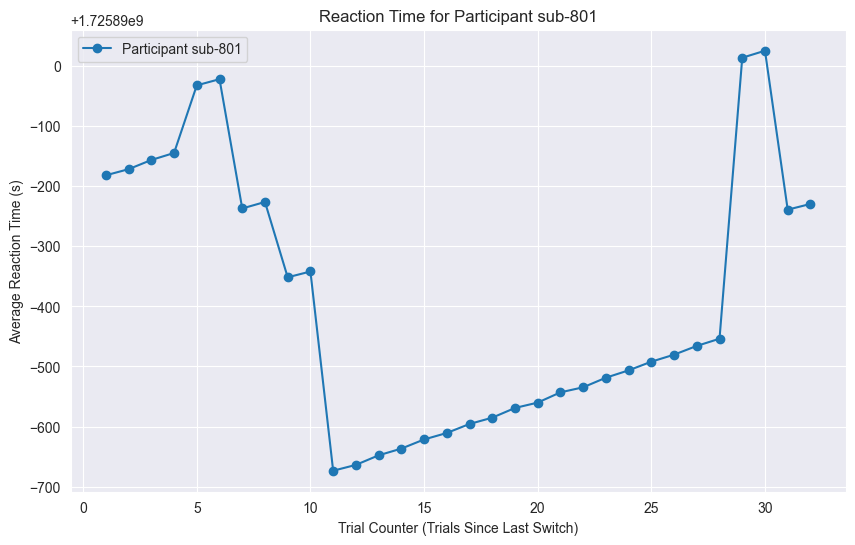

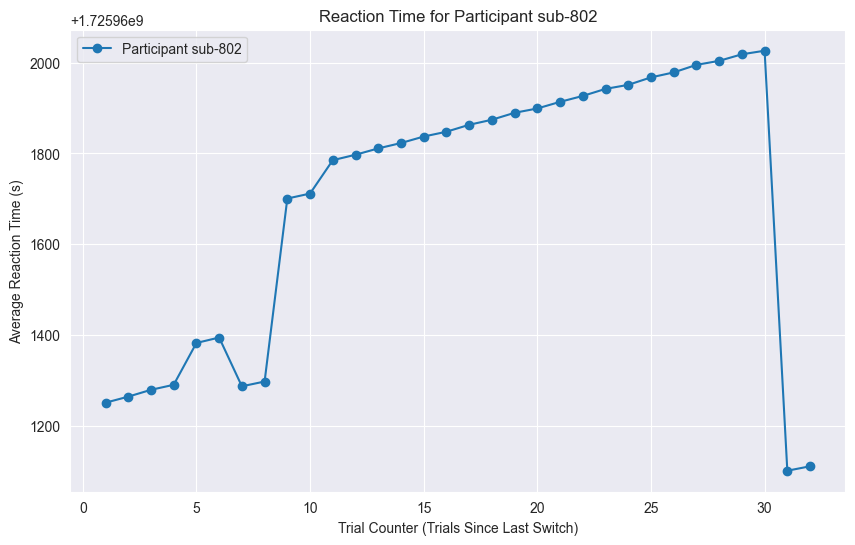

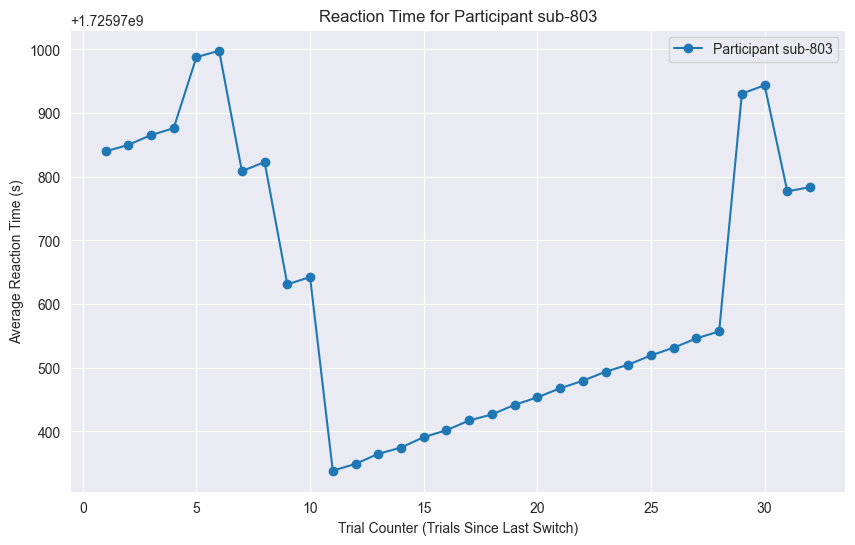

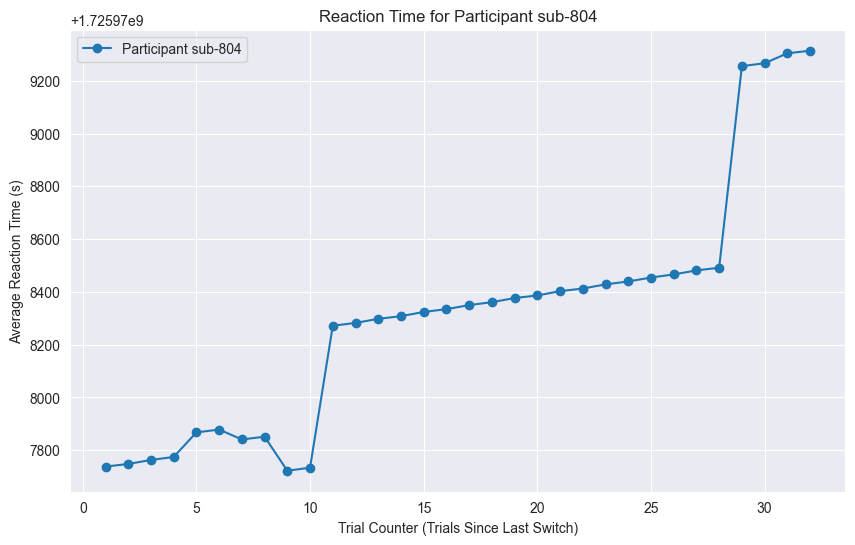

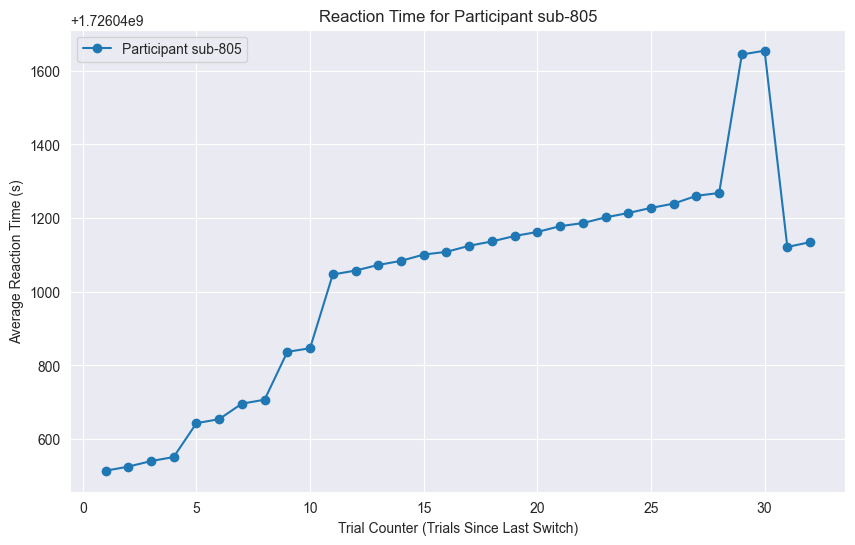

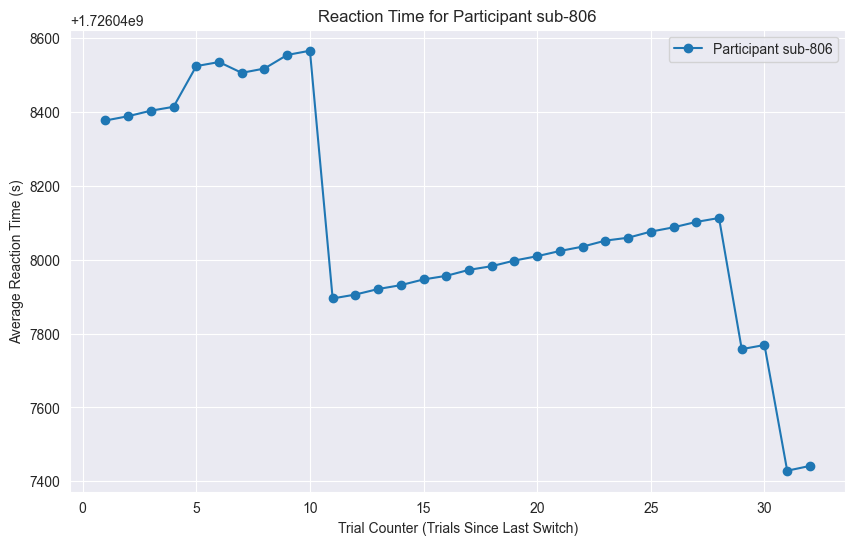

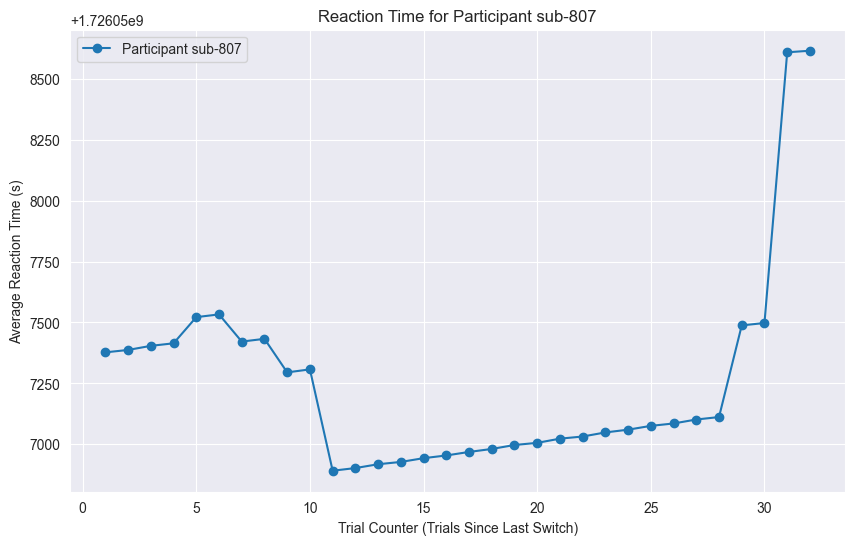

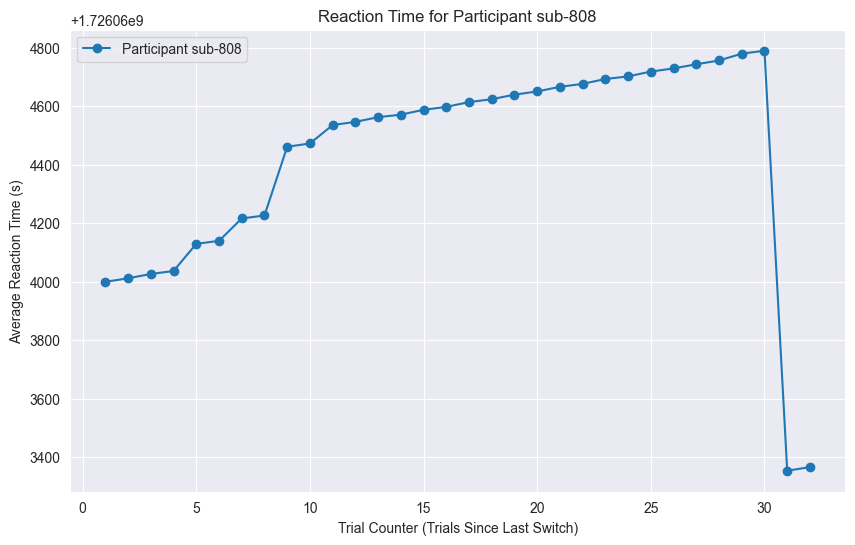

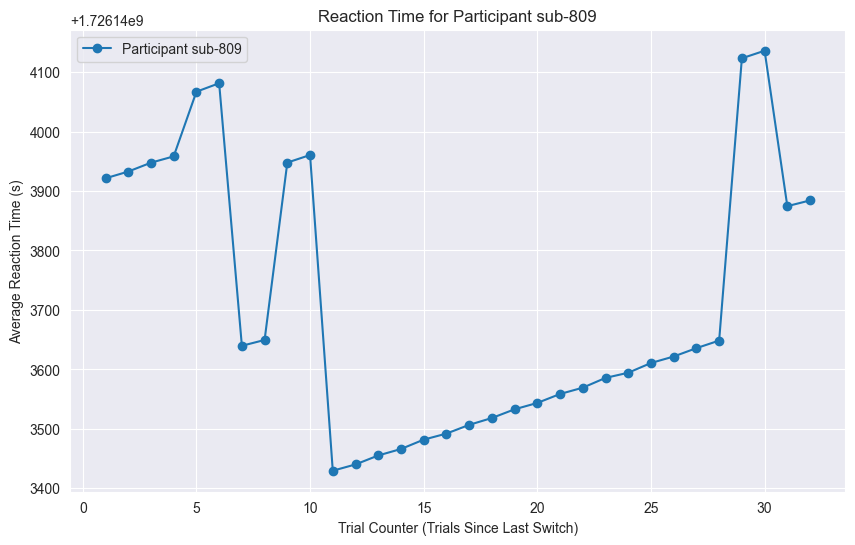

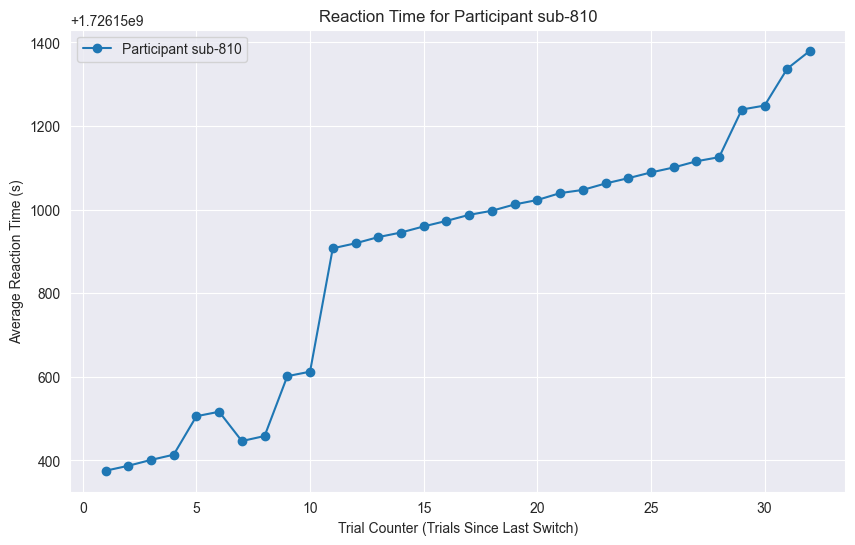

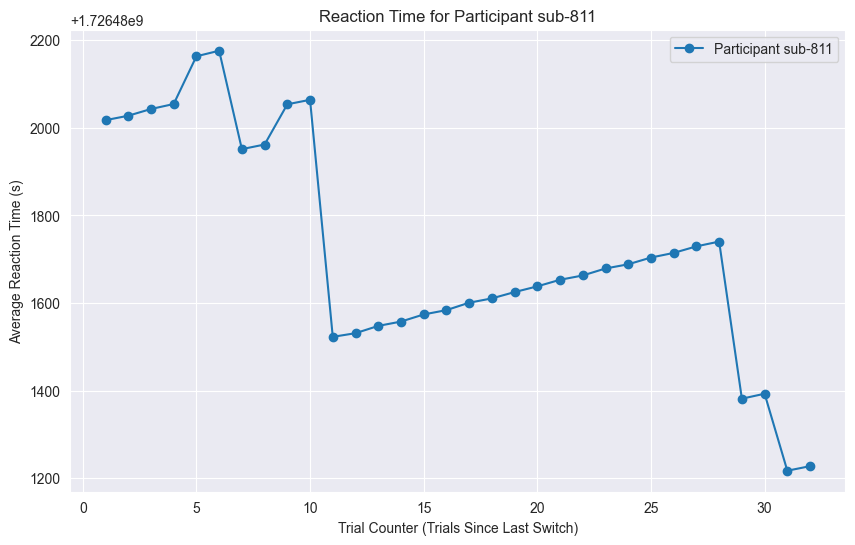

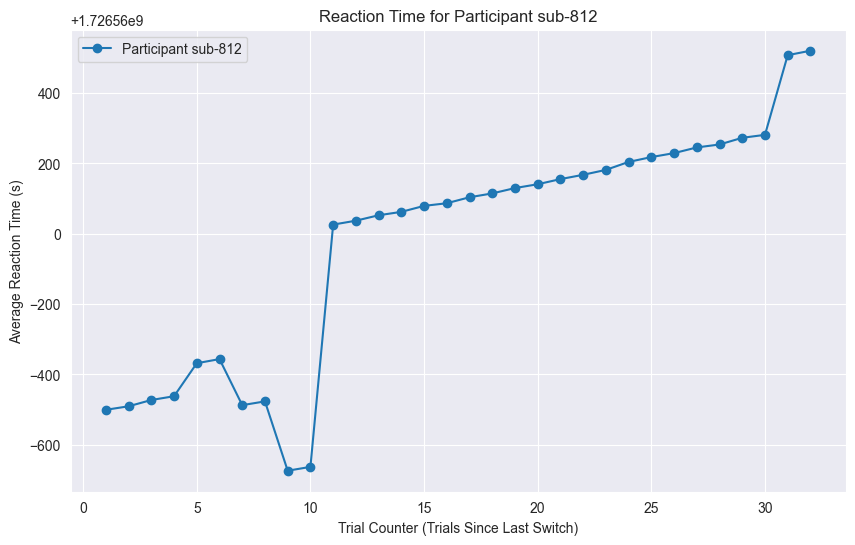

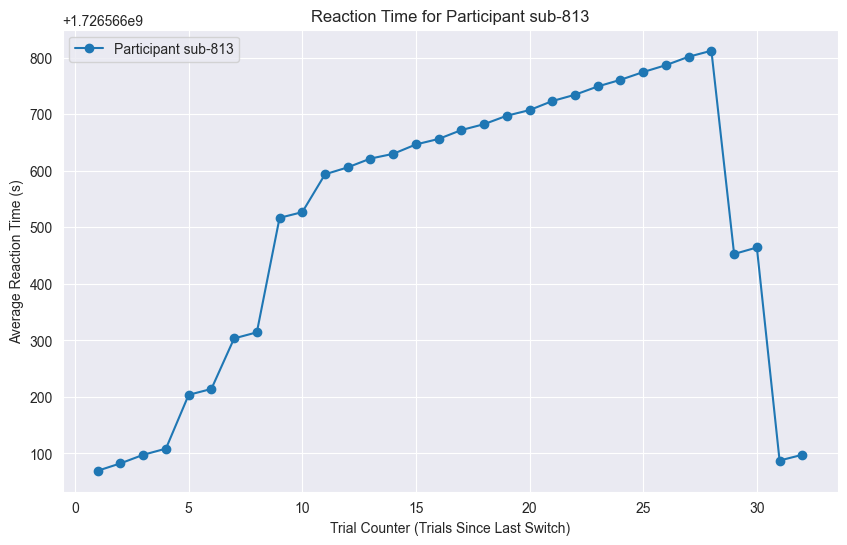

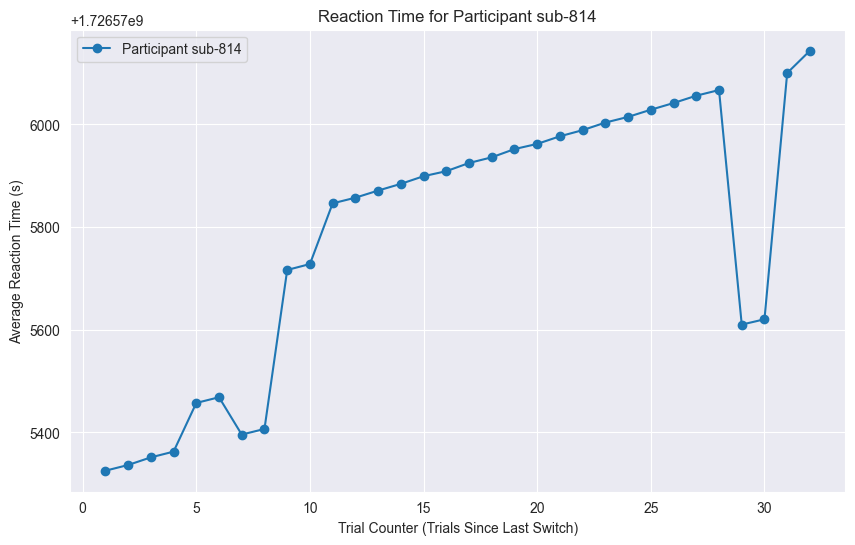

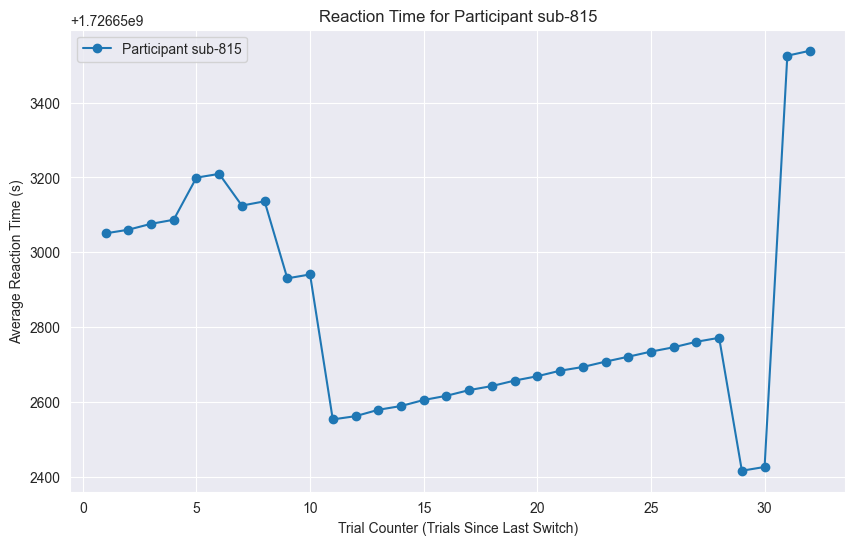

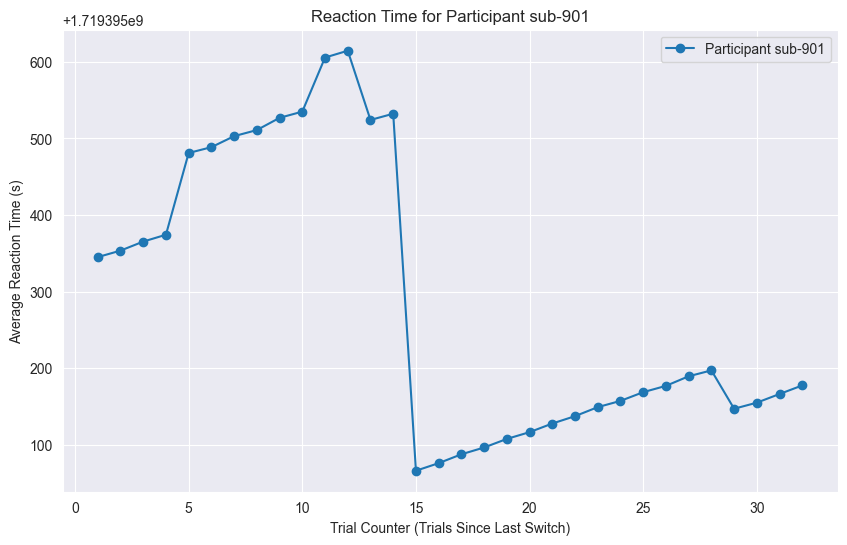

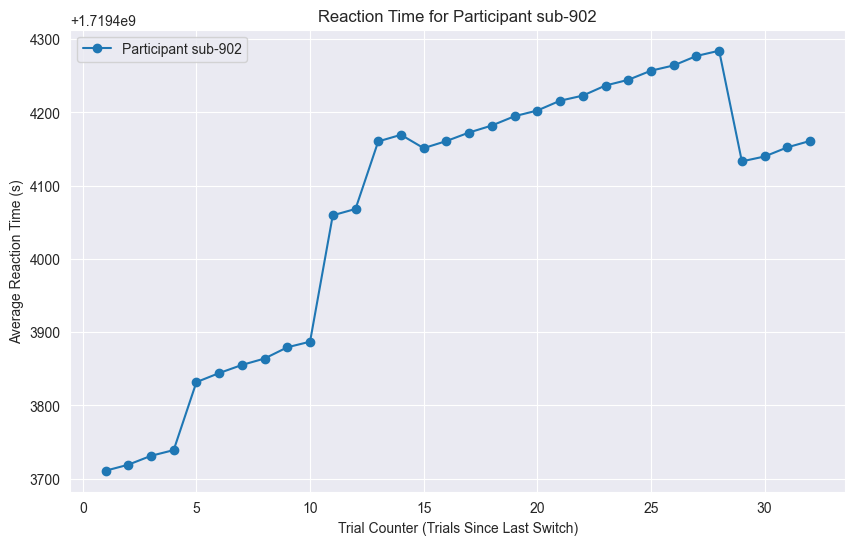

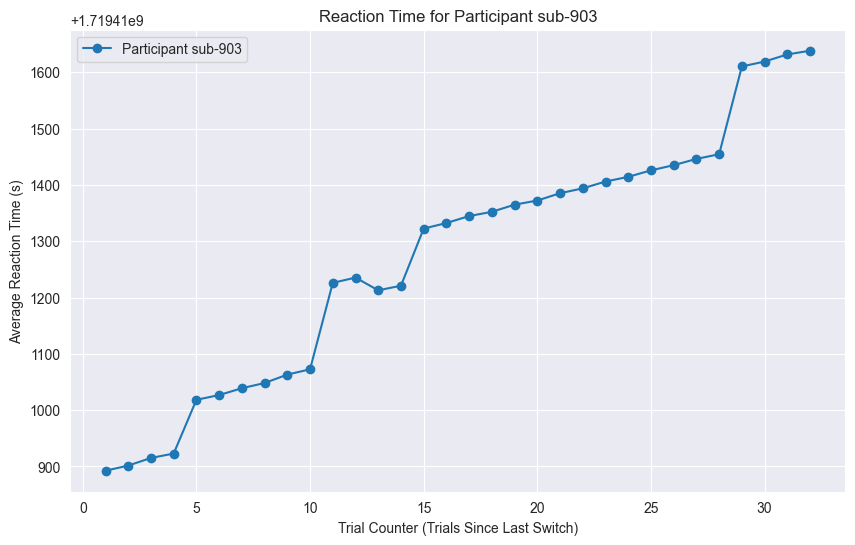

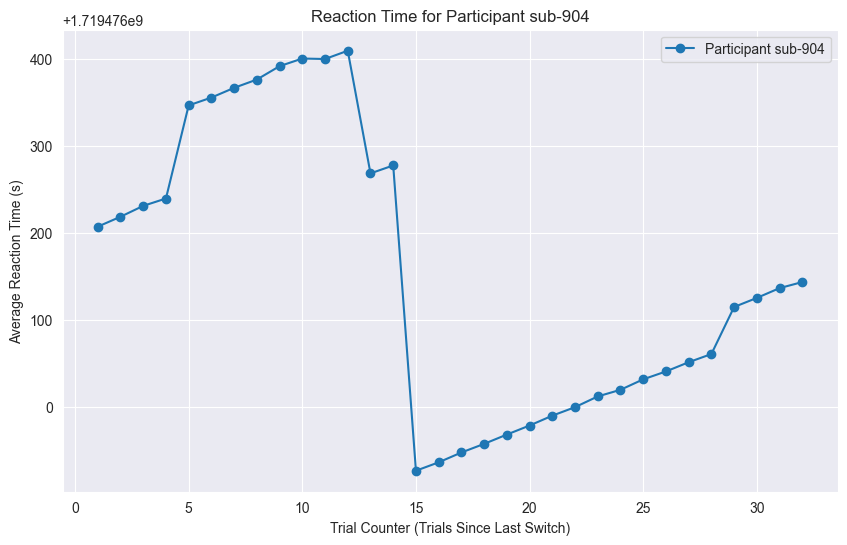

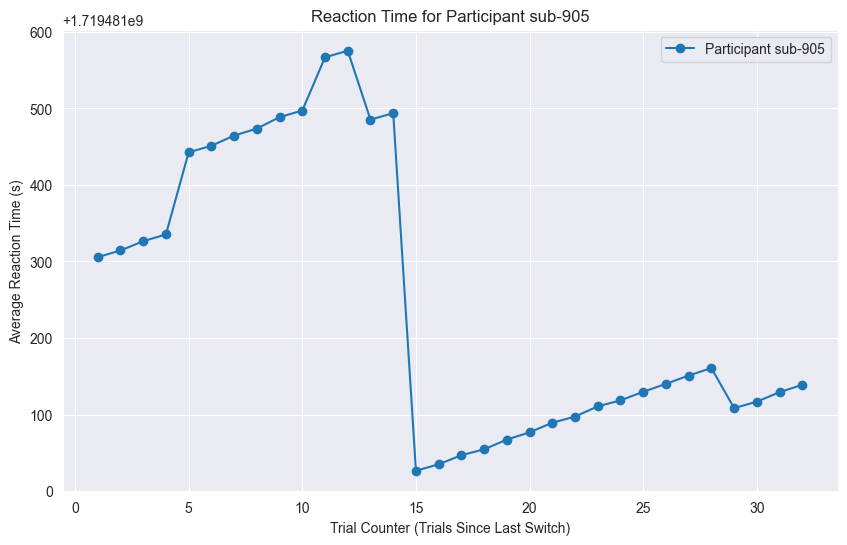

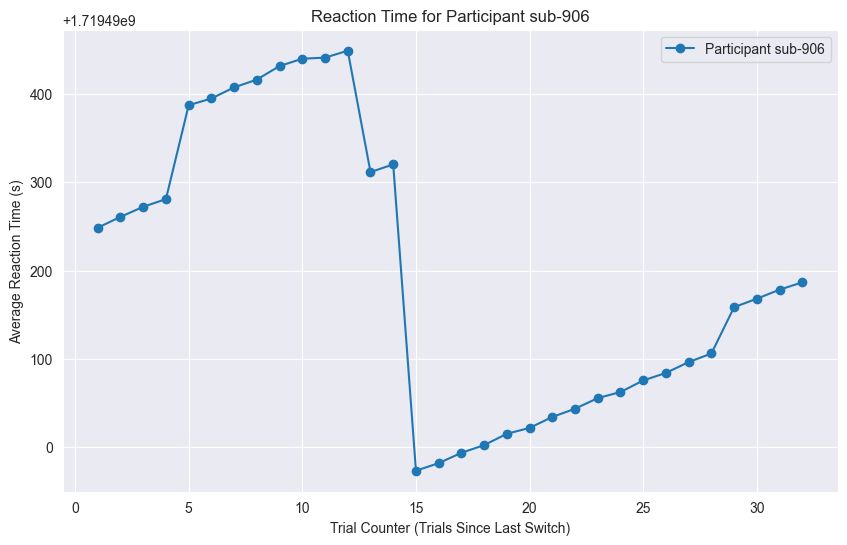

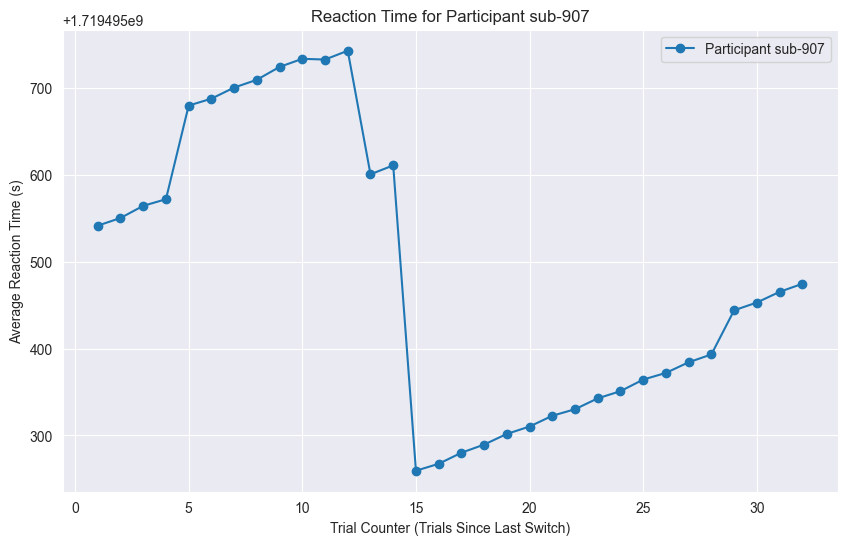

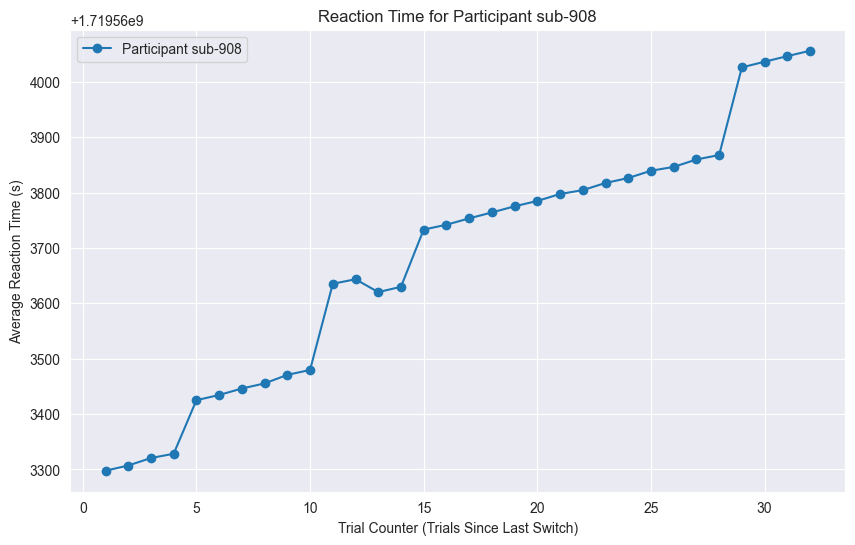

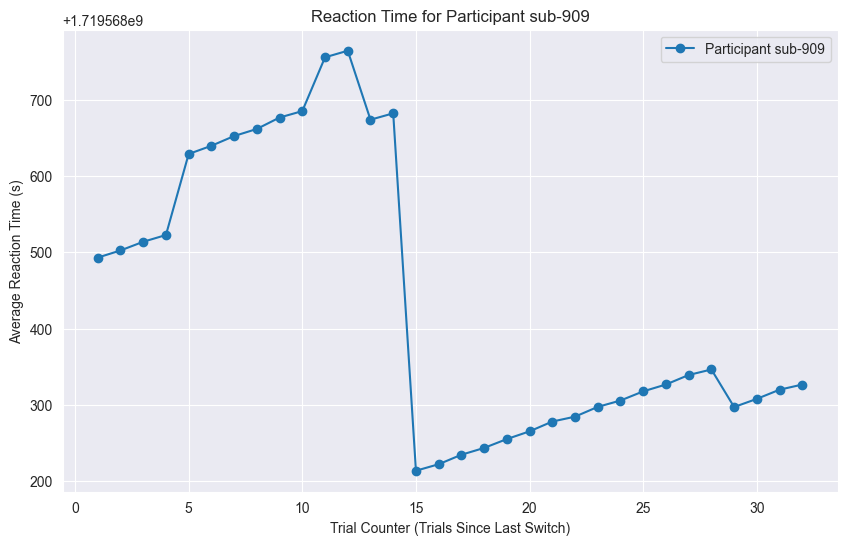

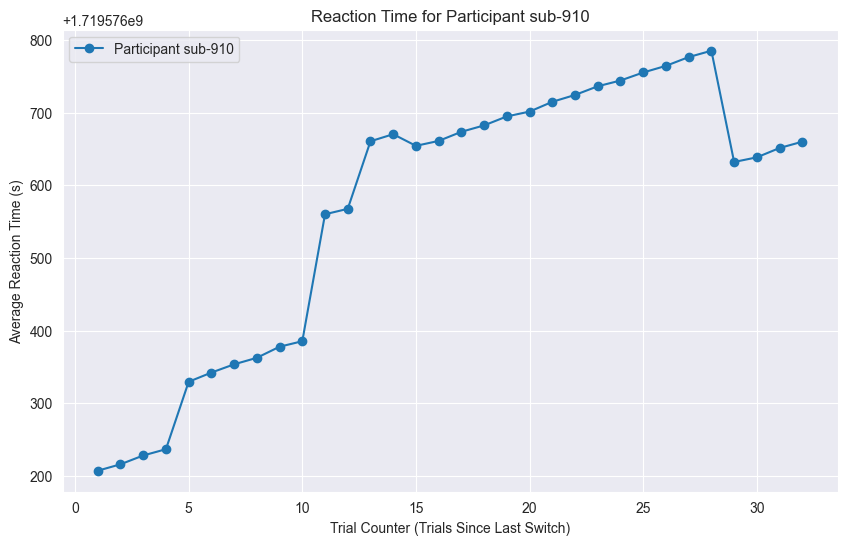

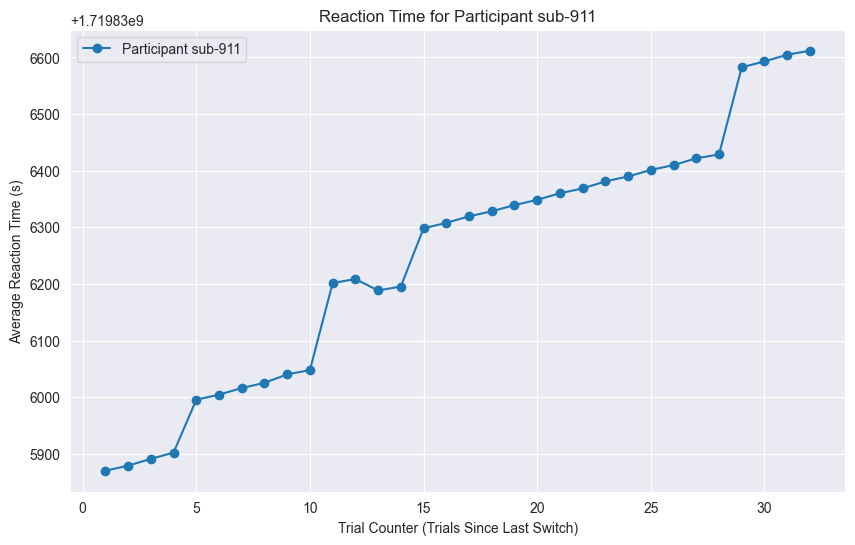

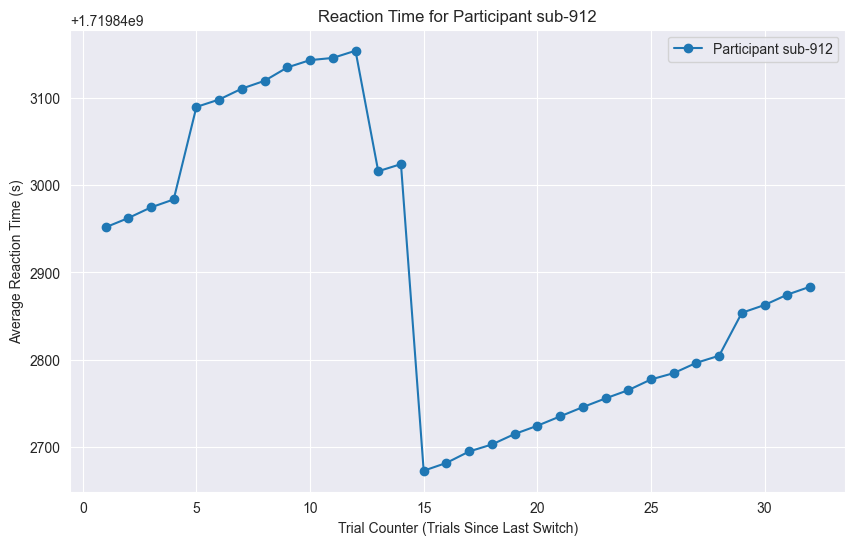

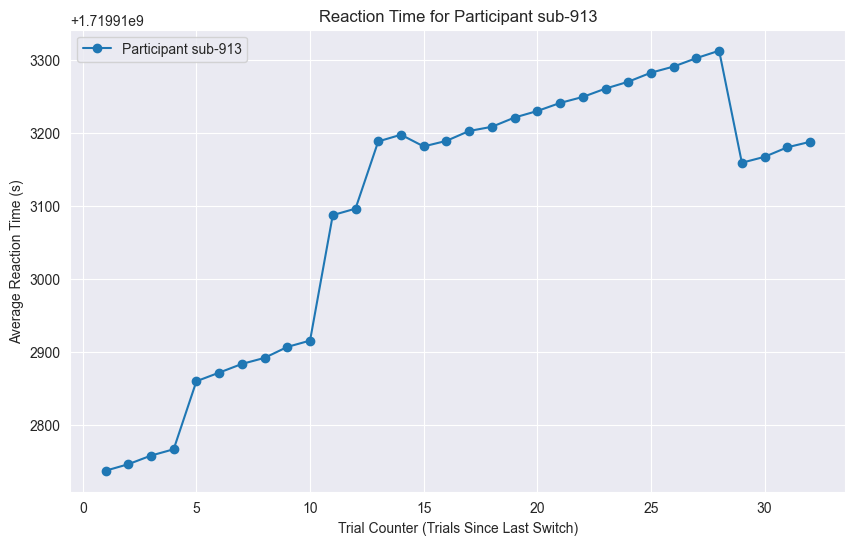

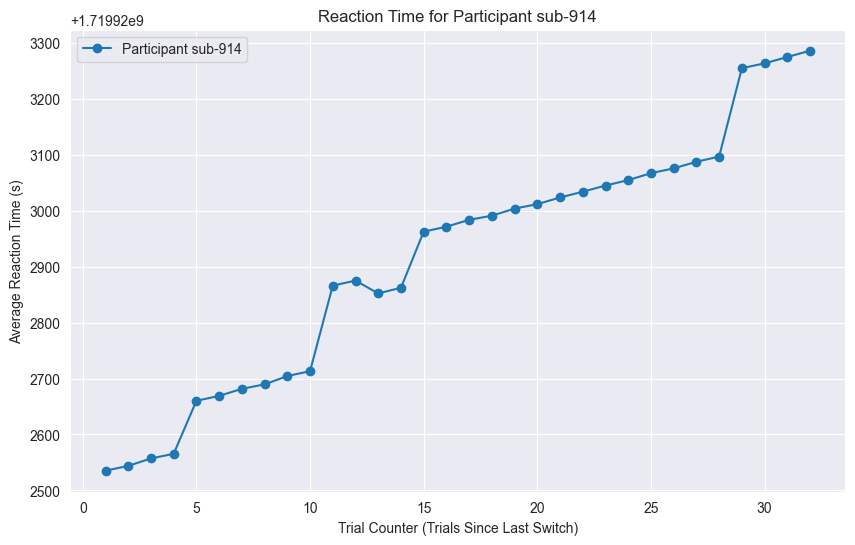

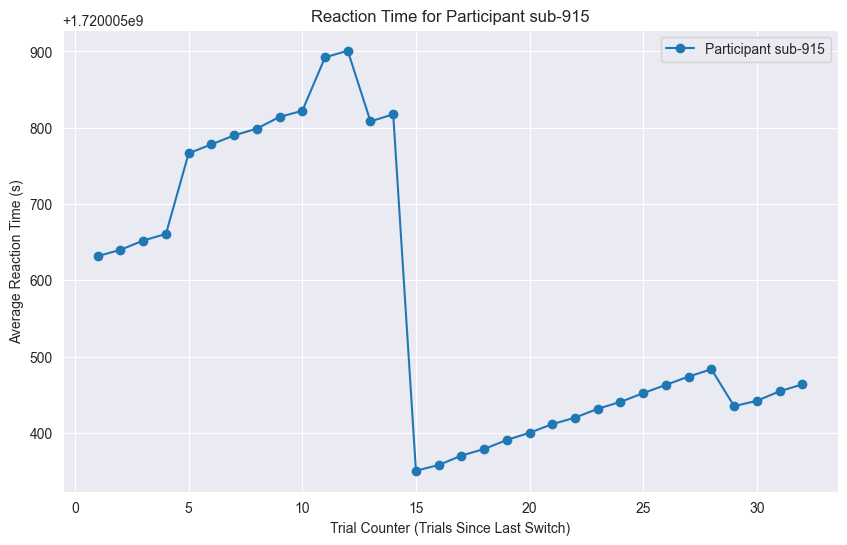

In [20]:
import matplotlib.pyplot as plt

# Iterate over each participant in the reaction_times_df
for participant in reaction_times_df.index:
    # Extract the reaction times for the participant
    reaction_times = reaction_times_df.loc[participant]
    
    # Plot the reaction time for this participant
    plt.figure(figsize=(10, 6))
    plt.plot(reaction_times.index, reaction_times.values, marker='o', linestyle='-', label=f'Participant {participant}')
    
    # Add labels and title
    plt.xlabel('Trial Counter (Trials Since Last Switch)')
    plt.ylabel('Average Reaction Time (s)')
    plt.title(f'Reaction Time for Participant {participant}')
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()
#need to think about this further seems like something didn't pull thorugh correctly 
# DO check of all reaction times as one box plot plus rain cloud plot plus violet plot per participant (all in one plot on after the other)= sanity check 

In [86]:
#look at total reaction after a switch rather than just initial response
#look in all reaction times as a first step

In [21]:
# Filter for counters from 0 to 15
filtered_reaction_times_df = reaction_times_df.loc['sub-801':'sub-815', 0:15]
print(filtered_reaction_times_df)



counter                   1             2             3             4   \
participant_id                                                           
sub-801         1.725890e+09  1.725890e+09  1.725890e+09  1.725890e+09   
sub-802         1.725961e+09  1.725961e+09  1.725961e+09  1.725961e+09   
sub-803         1.725971e+09  1.725971e+09  1.725971e+09  1.725971e+09   
sub-804         1.725978e+09  1.725978e+09  1.725978e+09  1.725978e+09   
sub-805         1.726041e+09  1.726041e+09  1.726041e+09  1.726041e+09   
sub-806         1.726048e+09  1.726048e+09  1.726048e+09  1.726048e+09   
sub-807         1.726057e+09  1.726057e+09  1.726057e+09  1.726057e+09   
sub-808         1.726064e+09  1.726064e+09  1.726064e+09  1.726064e+09   
sub-809         1.726144e+09  1.726144e+09  1.726144e+09  1.726144e+09   
sub-810         1.726150e+09  1.726150e+09  1.726150e+09  1.726150e+09   
sub-811         1.726482e+09  1.726482e+09  1.726482e+09  1.726482e+09   
sub-812         1.726559e+09  1.726560

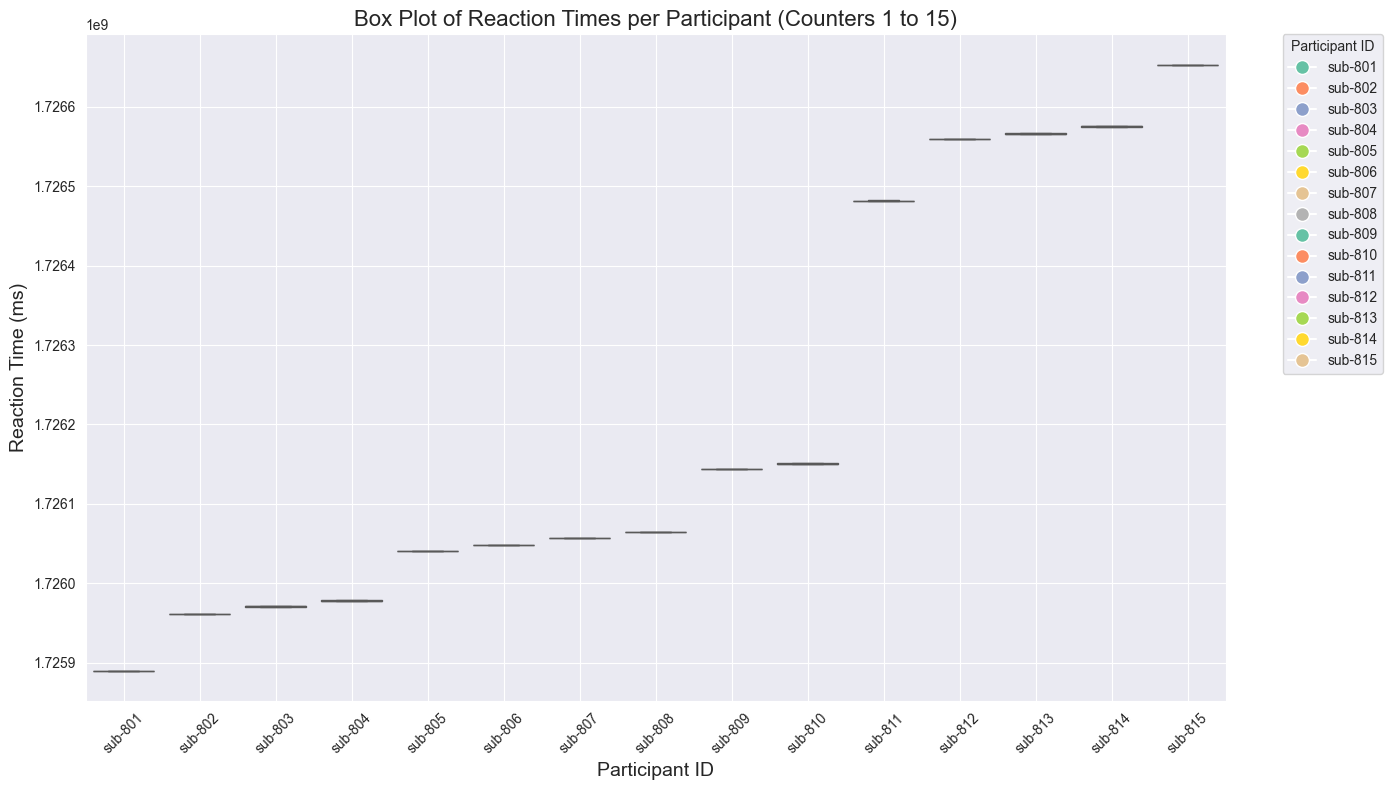

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `filtered_reaction_times_df` is the filtered DataFrame you created
# Step 1: Melt the DataFrame to convert it to long format
df_long = filtered_reaction_times_df.reset_index().melt(id_vars='participant_id', var_name='counter', value_name='response_time')

# Step 2: Create a box plot for the reaction times of each participant
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='participant_id', y='response_time', data=df_long, hue='participant_id', palette='Set2')

# Step 3: Customizing the plot
plt.title('Box Plot of Reaction Times per Participant (Counters 1 to 15)', fontsize=16)
plt.xlabel('Participant ID', fontsize=14)
plt.ylabel('Reaction Time (ms)', fontsize=14)  # Change to appropriate units if necessary
plt.xticks(rotation=45)
plt.grid(True)

# Step 4: Create a legend manually
unique_participants = df_long['participant_id'].unique()
colors = sns.color_palette('Set2', n_colors=len(unique_participants))

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(unique_participants))]
plt.legend(handles, unique_participants, title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


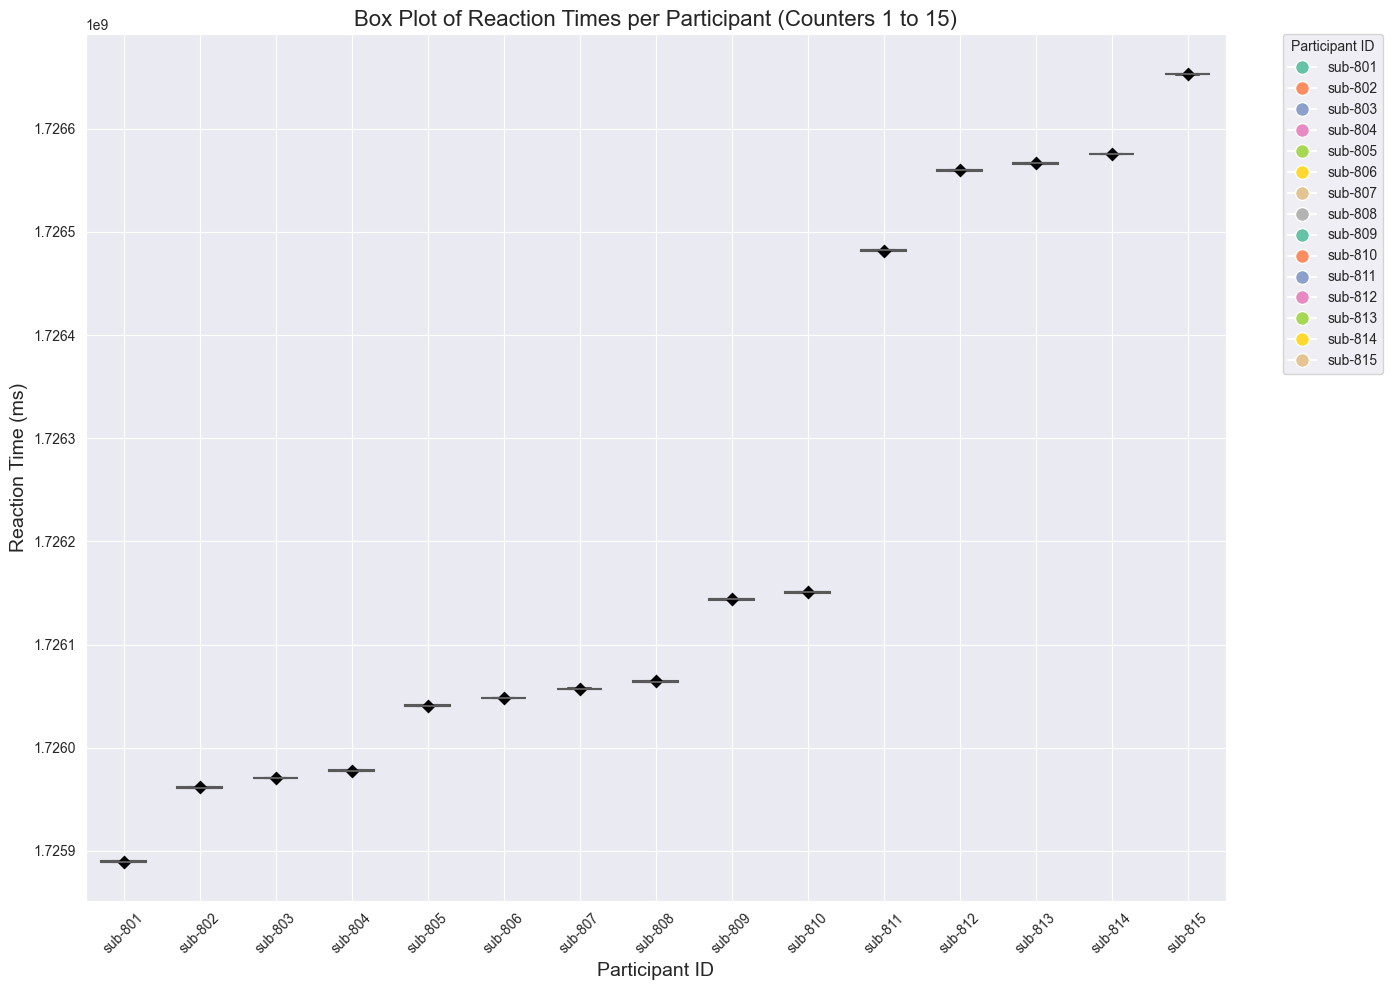

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `filtered_reaction_times_df` is the filtered DataFrame you created
# Step 1: Melt the DataFrame to convert it to long format
df_long = filtered_reaction_times_df.reset_index().melt(id_vars='participant_id', var_name='counter', value_name='response_time')

# Step 2: Create a box plot for the reaction times of each participant
plt.figure(figsize=(14, 10))  # Adjusted height to make the plot taller
box_plot = sns.boxplot(
    x='participant_id', 
    y='response_time', 
    data=df_long, 
    hue='participant_id', 
    palette='Set2',
    width=0.6,           # Adjust width of each box plot
    linewidth=1.5        # Adjust thickness of the box plot lines
)

# Step 3: Overlay a point plot to show mean with error bars
sns.pointplot(
    x='participant_id', 
    y='response_time', 
    data=df_long, 
    color='black',           # Color for the error bars
    estimator='mean',        # Plot the mean value
    errorbar='sd',           # Use standard deviation as the error bar
    linestyle='none',        # Remove the line connecting points
    markers='D',             # Marker style
    markersize=5             # Size of the markers
)

# Step 4: Customizing the plot
plt.title('Box Plot of Reaction Times per Participant (Counters 1 to 15)', fontsize=16)
plt.xlabel('Participant ID', fontsize=14)
plt.ylabel('Reaction Time (ms)', fontsize=14)  # Change to appropriate units if necessary
plt.xticks(rotation=45)
plt.grid(True)

# Step 5: Create a legend manually
unique_participants = df_long['participant_id'].unique()
colors = sns.color_palette('Set2', n_colors=len(unique_participants))

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(unique_participants))]
plt.legend(handles, unique_participants, title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [25]:
print(df_sorted.dtypes)

trial                            int64
emotional_cue_time             float64
response                        object
objectively_correct             object
subjectively_correct            object
response_time                  float64
RT_s                           float64
stimuli_type                     int64
iti                              int64
probability_condition            int64
face_type                        int64
stimuli_name                    object
reward_amount                  float64
participant_id                  object
session_number                  object
feedback_time                  float64
objectively_correct_numeric    float64
trials_since_last_switch          bool
counter                          int64
dtype: object


In [39]:
# Select the specified columns and create a new DataFrame
df_filtered = df_sorted[['participant_id', 'counter', 'RT_s']].copy()
print(df_filtered)

      participant_id  counter   RT_s
0            sub-801        1  1.201
1            sub-801        2  0.695
2            sub-801        3  0.998
3            sub-801        4  0.715
4            sub-801        1  0.647
...              ...      ...    ...
20215        sub-915        8  0.765
20216        sub-915        9  0.623
20217        sub-915       10  0.484
20218        sub-915       11  0.702
20219        sub-915       12  0.728

[20220 rows x 3 columns]


In [40]:
# Adjust 'counter' values to be within the range 0 to 15
df_filtered['counter'] = df_filtered['counter'] % 16
print(df_filtered)

      participant_id  counter   RT_s
0            sub-801        1  1.201
1            sub-801        2  0.695
2            sub-801        3  0.998
3            sub-801        4  0.715
4            sub-801        1  0.647
...              ...      ...    ...
20215        sub-915        8  0.765
20216        sub-915        9  0.623
20217        sub-915       10  0.484
20218        sub-915       11  0.702
20219        sub-915       12  0.728

[20220 rows x 3 columns]


In [41]:
# Remove the 'sub-' prefix, convert to integer, and filter for participant IDs between 801 and 815
df_filtered = df_filtered[df_filtered['participant_id'].str.extract(r'(\d+)').astype(int)[0].between(801, 815)]

# Adjust 'counter' values to be within the range 0 to 15
df_filtered['counter'] = df_filtered['counter'] % 16
print(df_filtered)

      participant_id  counter   RT_s
0            sub-801        1  1.201
1            sub-801        2  0.695
2            sub-801        3  0.998
3            sub-801        4  0.715
4            sub-801        1  0.647
...              ...      ...    ...
10015        sub-815        2  0.529
10016        sub-815        3  0.664
10017        sub-815        4  0.578
10018        sub-815        5  0.510
10019        sub-815        6  1.012

[10020 rows x 3 columns]


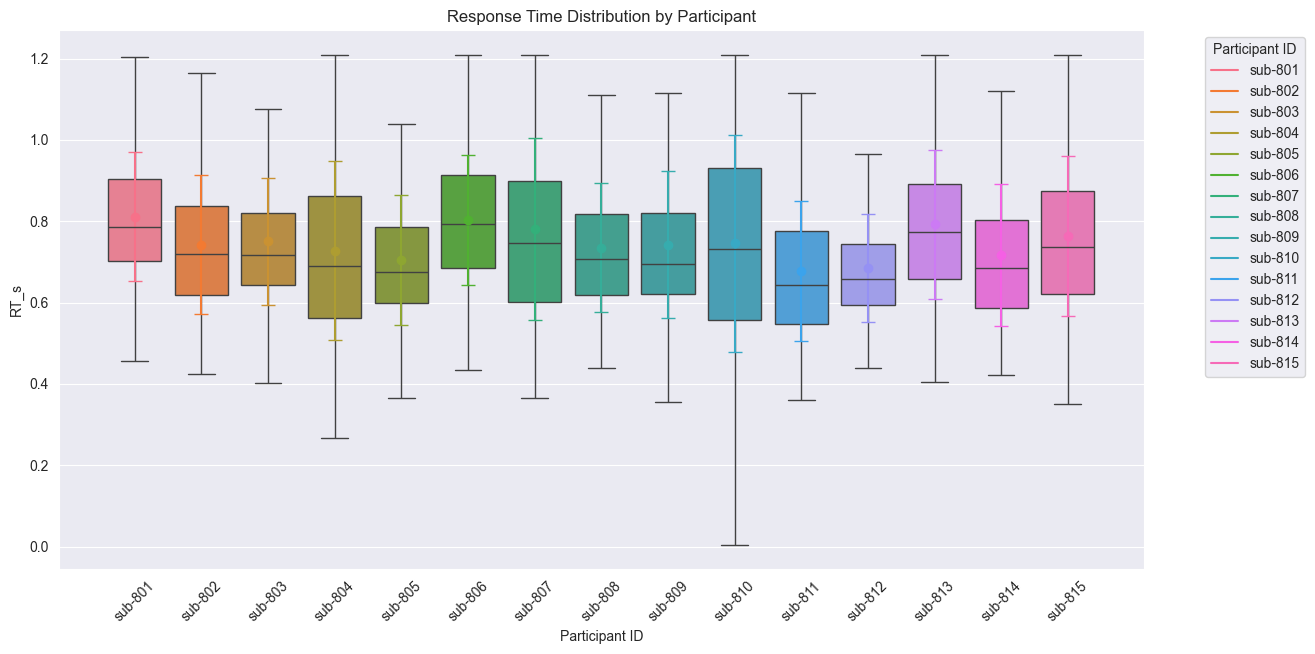

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by 'participant_id'
df_filtered = df_filtered.sort_values(by='participant_id')

# Set up a color palette with one color per participant
unique_participants = sorted(df_filtered['participant_id'].unique())
palette = sns.color_palette("husl", len(unique_participants))  # 'husl' gives a range of distinct colors
color_mapping = dict(zip(unique_participants, palette))

# Create a box plot with unique colors for each participant
plt.figure(figsize=(14, 7))

# Create the box plot with 'hue' to apply the color palette
sns.boxplot(
    x='participant_id', y='RT_s', data=df_filtered,
    hue='participant_id', palette=color_mapping, dodge=False, legend=False, showfliers=False
)

# Add error bars (for example, using the standard deviation as error bars)
for participant in unique_participants:
    # Calculate mean and standard deviation for each participant
    participant_data = df_filtered[df_filtered['participant_id'] == participant]['RT_s']
    mean = participant_data.mean()
    std_dev = participant_data.std()

    # Find the x position of the participant in the box plot
    x_pos = unique_participants.index(participant)
    
    # Plot error bars (std dev) on top of the box plot
    plt.errorbar(x_pos, mean, yerr=std_dev, fmt='o', color=color_mapping[participant], capsize=5)

# Custom legend to show colors for each participant
for participant, color in color_mapping.items():
    plt.plot([], [], color=color, label=participant)
plt.legend(title="Participant ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.xlabel("Participant ID")
plt.ylabel("RT_s")
plt.title("Response Time Distribution by Participant")
plt.xticks(rotation=45)

# Show the plot
plt.show()



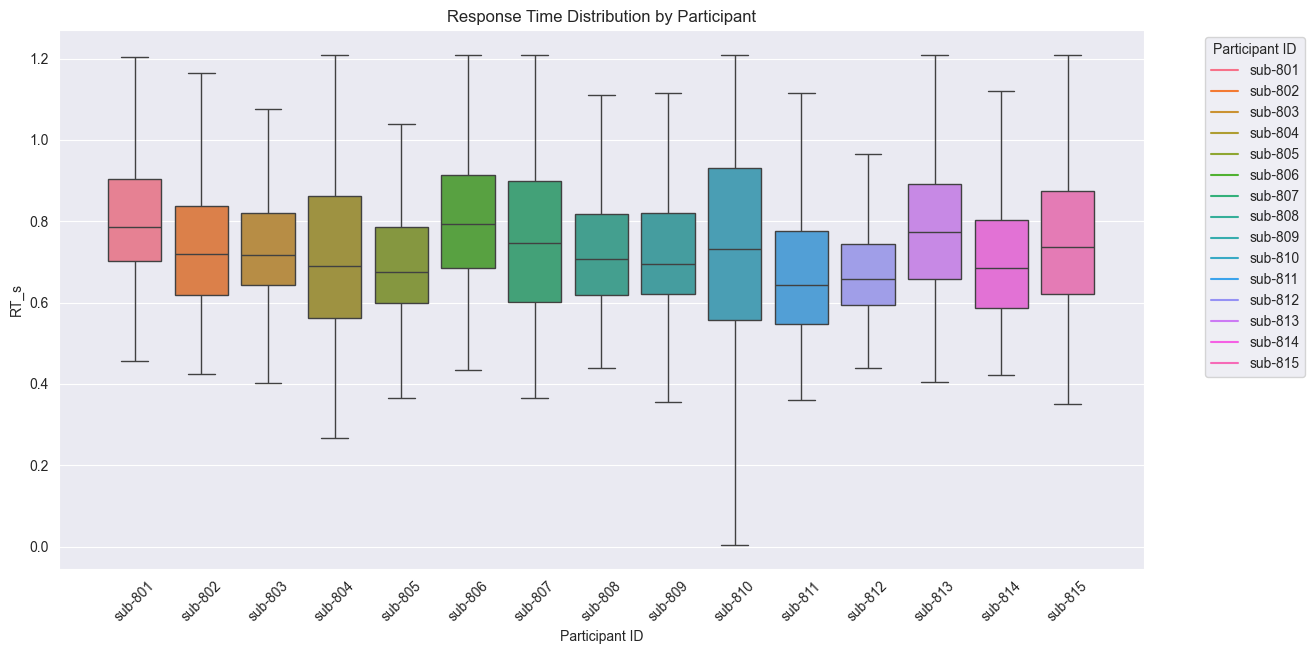

In [49]:
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by 'participant_id'
df_filtered = df_filtered.sort_values(by='participant_id')

# Set up a color palette with one color per participant
unique_participants = sorted(df_filtered['participant_id'].unique())
palette = sns.color_palette("husl", len(unique_participants))  # 'husl' gives a range of distinct colors
color_mapping = dict(zip(unique_participants, palette))

# Create a box plot with unique colors for each participant
plt.figure(figsize=(14, 7))

# Create the box plot with 'hue' to apply the color palette
sns.boxplot(
    x='participant_id', y='RT_s', data=df_filtered,
    hue='participant_id', palette=color_mapping, dodge=False, legend=False, showfliers=False
)



# Custom legend to show colors for each participant
for participant, color in color_mapping.items():
    plt.plot([], [], color=color, label=participant)
plt.legend(title="Participant ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.xlabel("Participant ID")
plt.ylabel("RT_s")
plt.title("Response Time Distribution by Participant")
plt.xticks(rotation=45)

# Show the plot
plt.show()

